In [1]:
!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,12

In [2]:

dataset= pd.read_csv('Electric_Production.csv')
dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['DATE'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_58532\658026798.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format=True)


In [3]:
from datetime import datetime

indexedDataset

IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
...                ...
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

[397 rows x 1 columns]

In [4]:
len(indexedDataset)

397

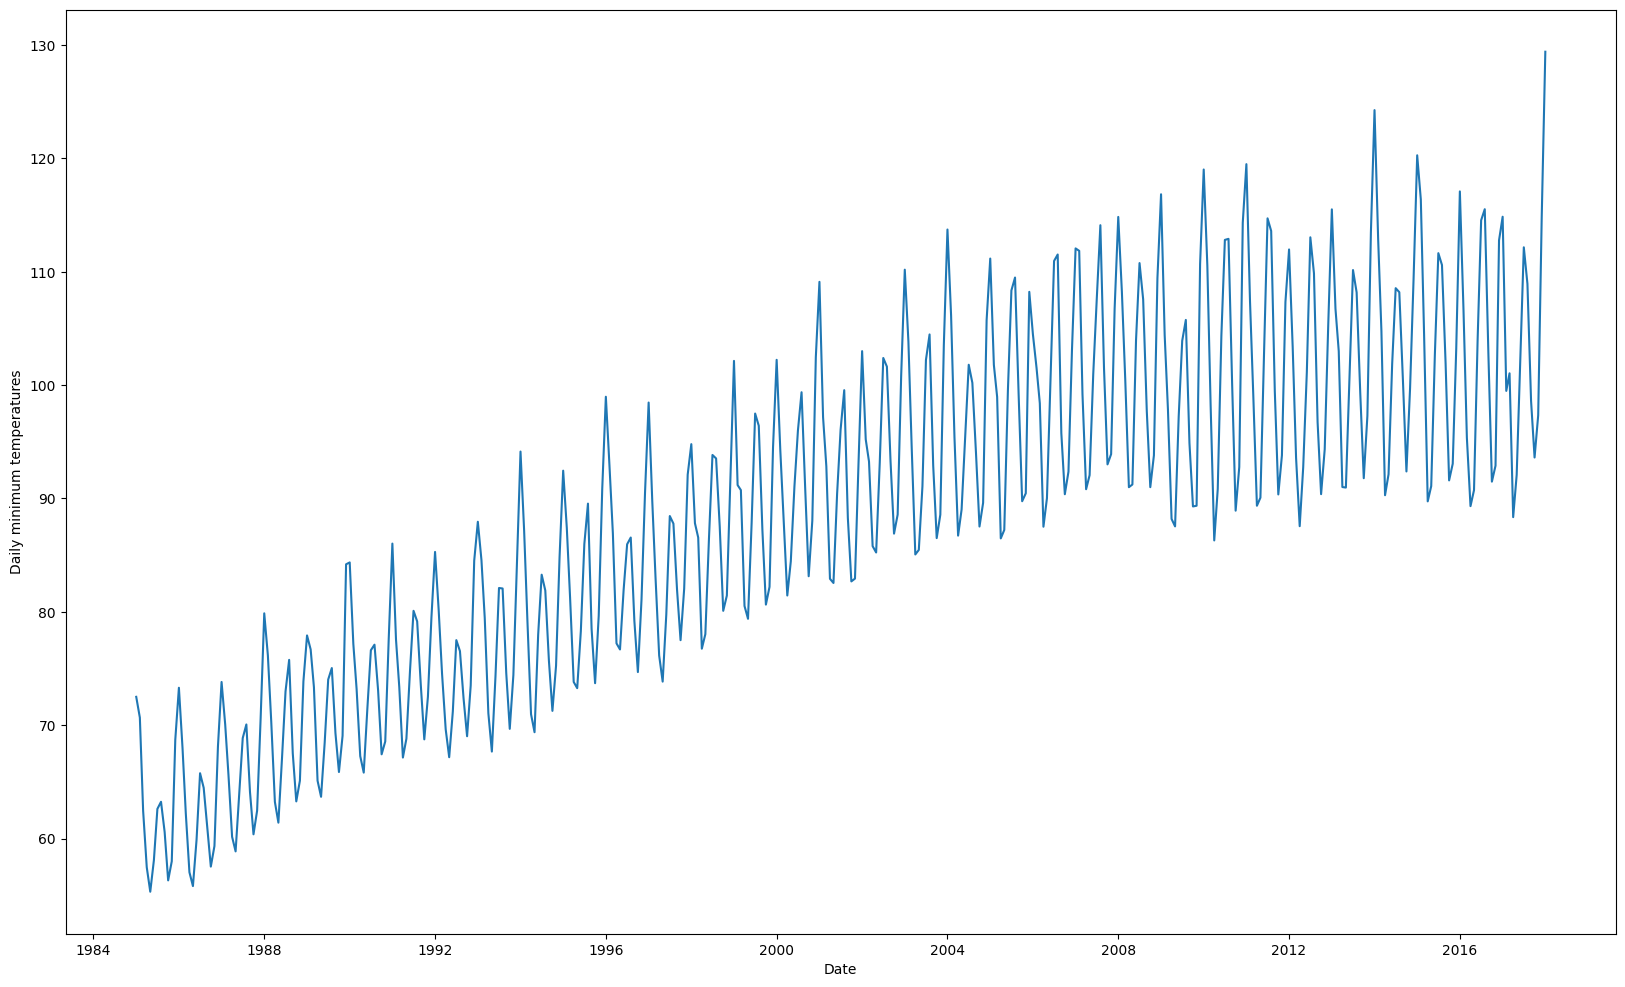

In [5]:
# plot graph
plt.xlabel("Date")
plt.ylabel("Daily minimum temperatures")
plt.plot(indexedDataset)


In [6]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean)


            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]


In [7]:
print(rolstd)

            IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    9.155641
2017-10-01    8.968447
2017-11-01    8.671317
2017-12-01    8.911131
2018-01-01   11.454780

[397 rows x 1 columns]


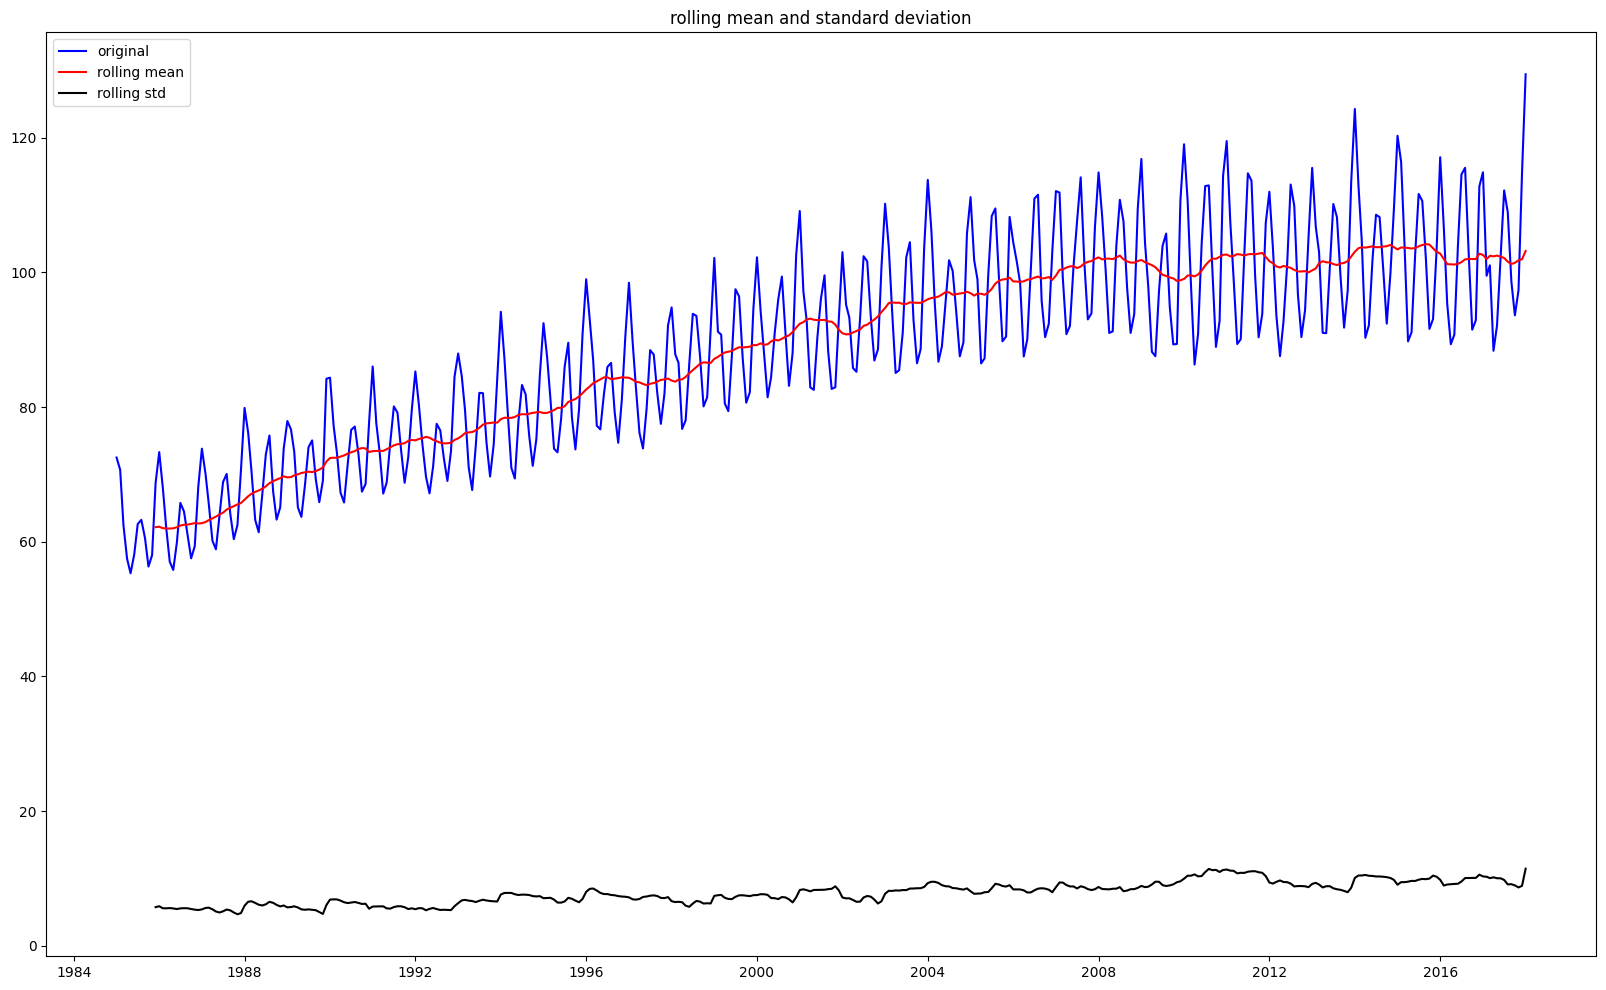

In [8]:
orig=plt.plot(indexedDataset, color='blue', label='original')
mean=plt.plot(rolmean, color='red', label='rolling mean' )
std=plt.plot(rolstd, color='black', label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)


In [9]:
print('Dataset is Stationary according to statistics of mean and standard deviation.')

Dataset is Stationary according to statistics of mean and standard deviation.


In [10]:
indexedDataset['IPG2211A2N']=indexedDataset['IPG2211A2N'].fillna(0.0)
indexedDataset

IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
...                ...
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

[397 rows x 1 columns]

In [11]:
# Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test: ')
dftest = adfuller(indexedDataset['IPG2211A2N'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)' % key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 
Test Statistic                  -2.256990
p-value                          0.186215
Lags Used                       15.000000
Number of Observations Used    381.000000
Critical value (1%)             -3.447631
Critical value (5%)             -2.869156
Critical value (10%)            -2.570827
dtype: float64


IPG2211A2N
DATE                  
1985-01-01    4.283658
1985-02-01    4.258049
1985-03-01    4.134369
1985-04-01    4.051287
1985-05-01    4.013046
...                ...
2017-09-01    4.591227
2017-10-01    4.539177
2017-11-01    4.578168
2017-12-01    4.742505
2018-01-01    4.862945

[397 rows x 1 columns]

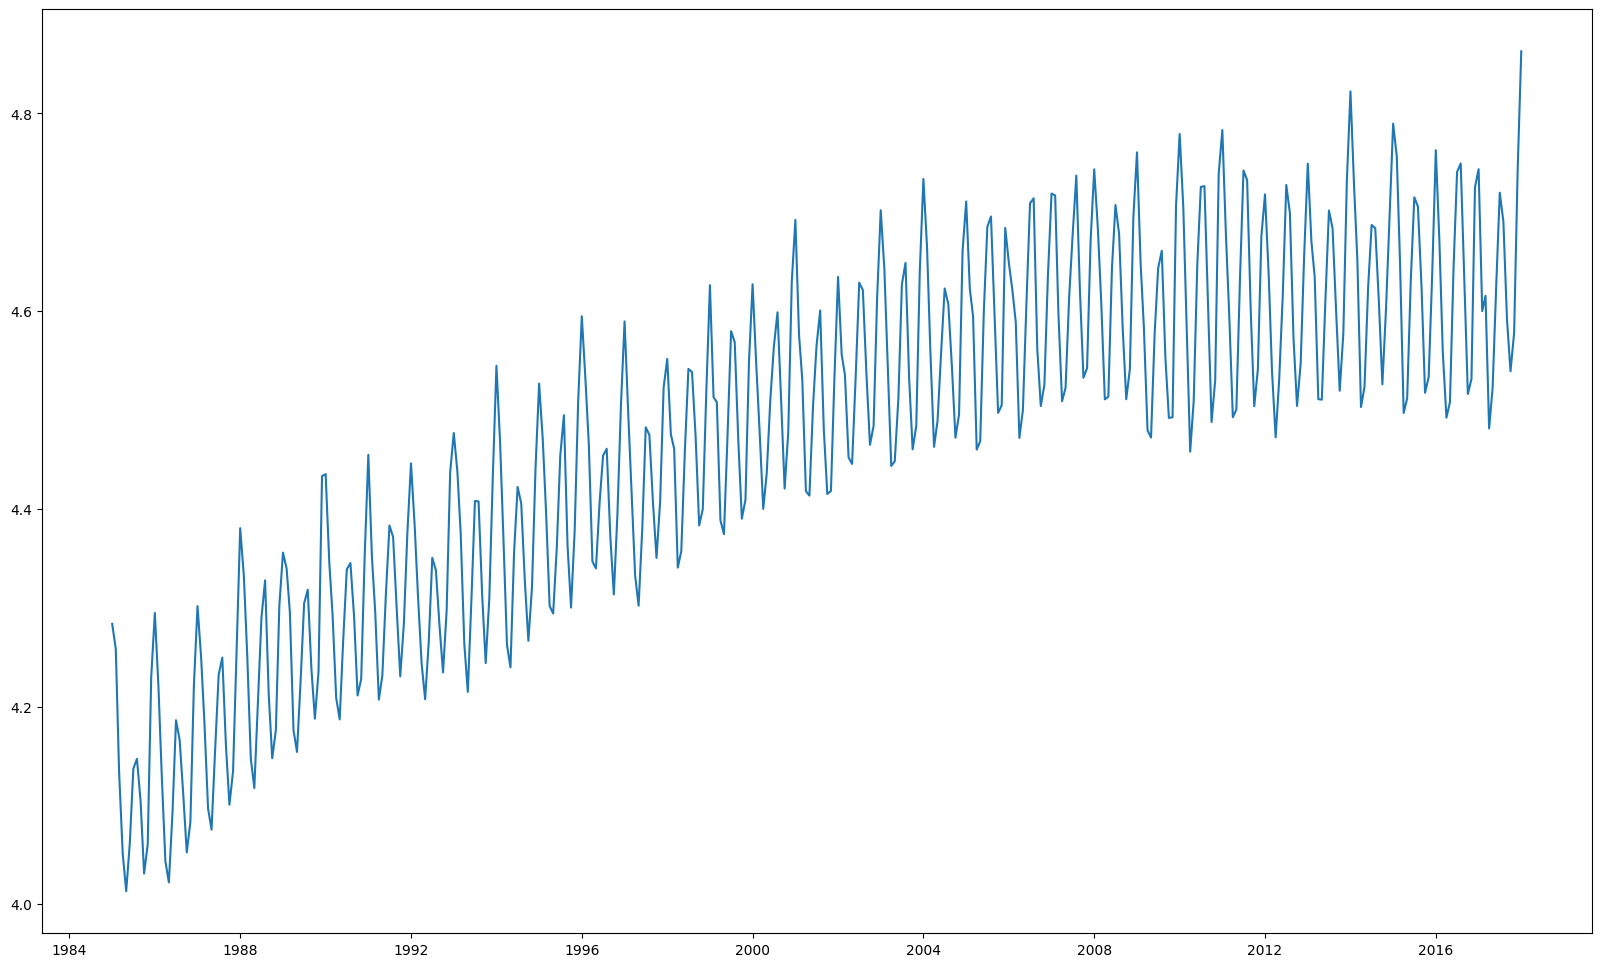

In [12]:
#Estimating Trend (scale has changed)
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)
indexedDataset_logscale

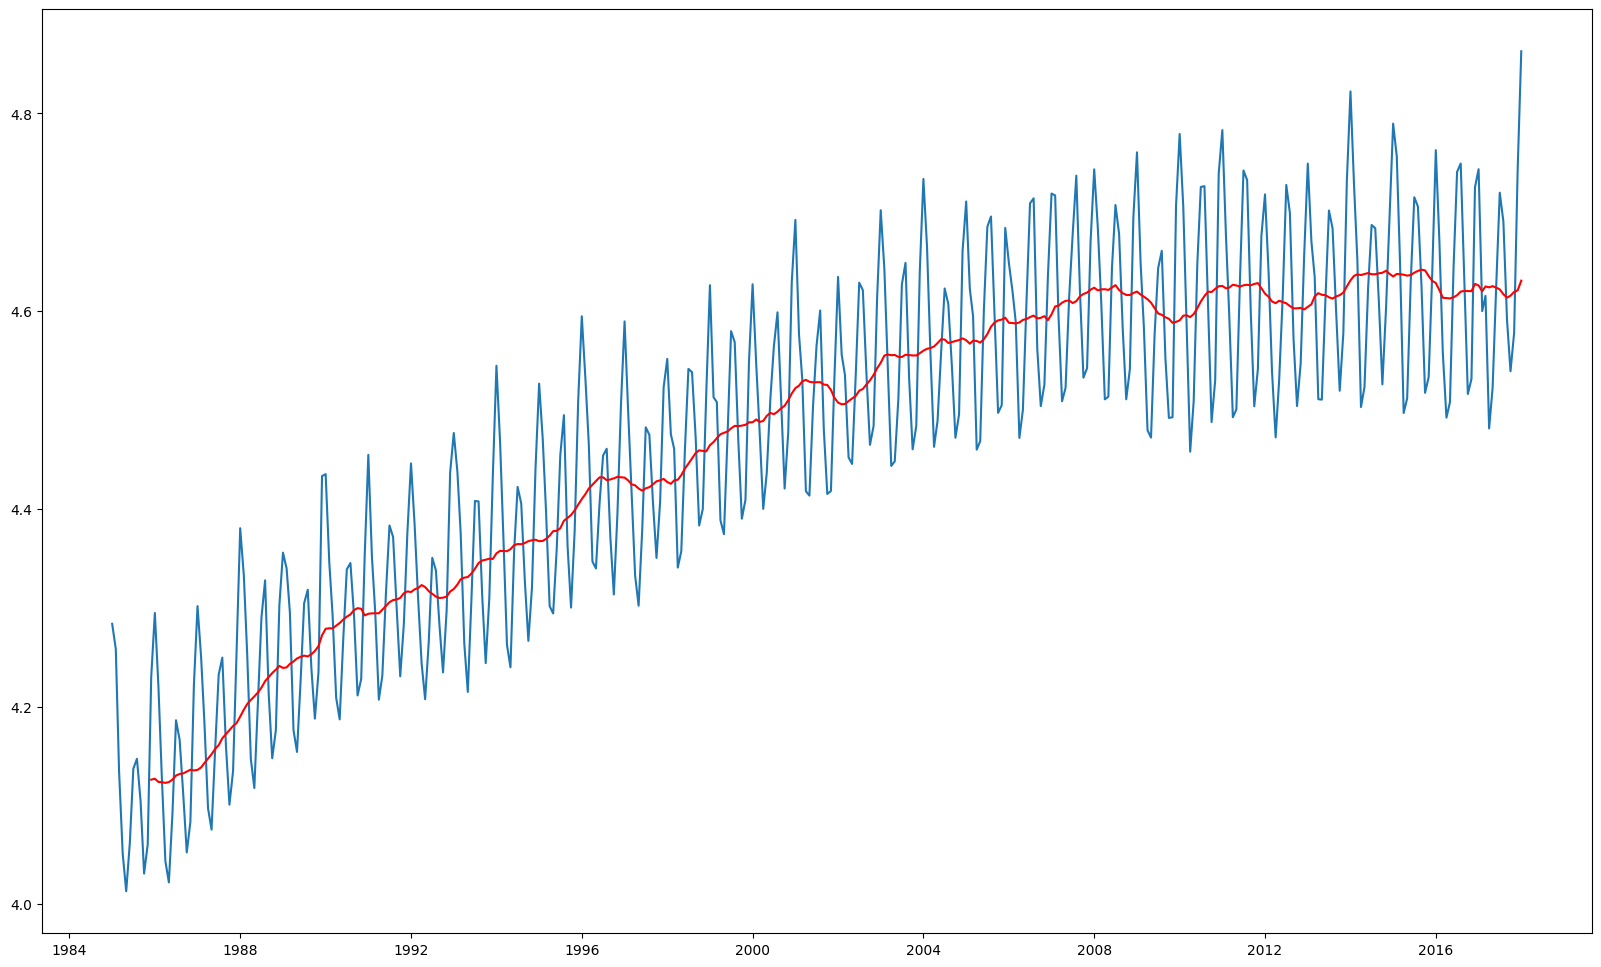

In [13]:
#Taking MA (Moving Average Model)
movingAverage=indexedDataset_logscale.rolling(window=12).mean()
movingSTD=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color='red')

In [14]:
datasetLogScaleMinusMovingAverage=indexedDataset_logscale - movingAverage
movingAverage

IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01    4.613704
2017-10-01    4.615619
2017-11-01    4.619515
2017-12-01    4.620945
2018-01-01    4.630888

[397 rows x 1 columns]

In [15]:
#Remove Nan Values
datasetLogScaleMinusMovingAverage = datasetLogScaleMinusMovingAverage.dropna()
datasetLogScaleMinusMovingAverage.head(50)

IPG2211A2N
DATE                  
1985-12-01    0.103961
1986-01-01    0.167724
1986-02-01    0.095629
1986-03-01    0.007329
1986-04-01   -0.079115
1986-05-01   -0.101472
1986-06-01   -0.033363
1986-07-01    0.055963
1986-08-01    0.034639
1986-09-01   -0.021429
1986-10-01   -0.081748
1986-11-01   -0.052685
1986-12-01    0.086205
1987-01-01    0.165695
1987-02-01    0.111006
1987-03-01    0.040935
1987-04-01   -0.050255
1987-05-01   -0.076298
1987-06-01    0.000129
1987-07-01    0.071306
1987-08-01    0.081622
1987-09-01   -0.011298
1987-10-01   -0.075363
1987-11-01   -0.045681
1987-12-01    0.073503
1988-01-01    0.190623
1988-02-01    0.136127
1988-03-01    0.050186
1988-04-01   -0.059732
1988-05-01   -0.092638
1988-06-01   -0.007920
1988-07-01    0.071126
1988-08-01    0.102045
1988-09-01   -0.017551
1988-10-01   -0.086199
1988-11-01   -0.061229
1988-12-01    0.061149
1989-01-01    0.116664
1989-02-01    0.100099
1989-03-01    0.052153
1989-04-01   -0.069500
1989-05-01   -0.094575
1989-06-01   -0.023837
1989-07-01    0.053018
1989-08-01    0.067428
1989-09-01   -0.014317
1989-10-01   -0.068445
1989-11-01   -0.025976
1989-12-01    0.161119
1990-01-01    0.156457

In [16]:
# DCF Test (Augmented Dickey-Fuller (ADF) Test)
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def test_stationarity(timeseries):
    # Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries['IPG2211A2N'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' % key] = value
    print(dfoutput)
#test_stationarity(indexedDataset)

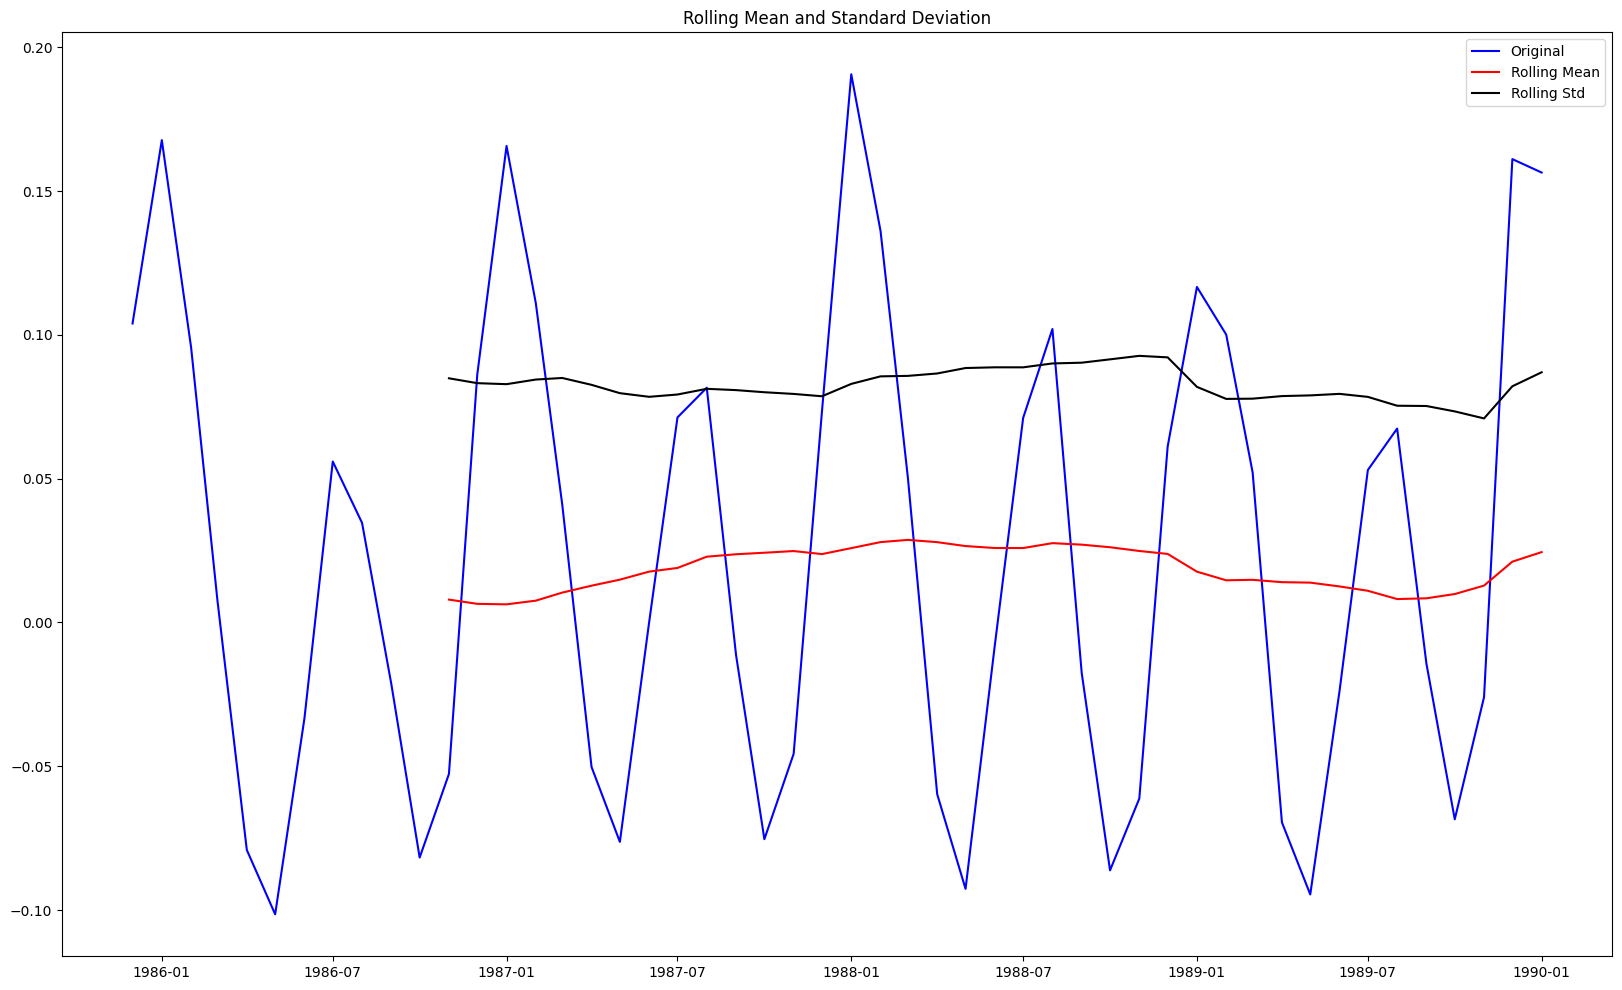

Results of Dickey-Fuller Test
Test Statistic                 -1.689809
p-value                         0.436371
Lags Used                      10.000000
Number of Observations Used    39.000000
Critical value (1%)            -3.610400
Critical value (5%)            -2.939109
Critical value (10%)           -2.608063
dtype: float64


In [17]:
test_stationarity(datasetLogScaleMinusMovingAverage.head(50))

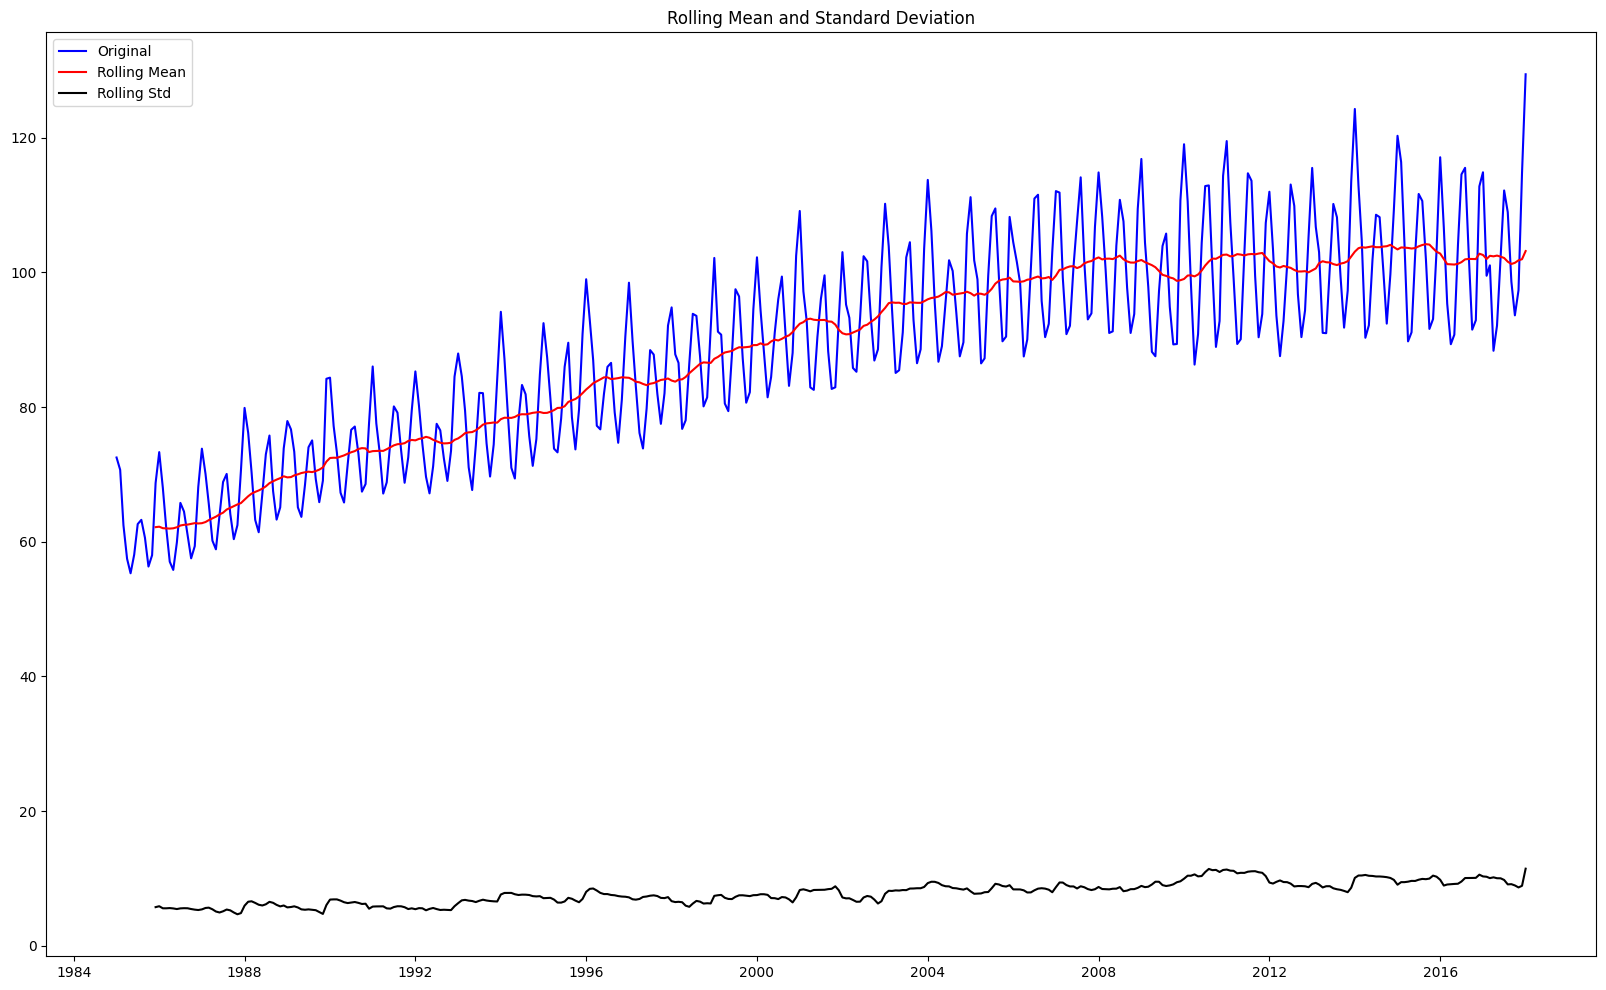

Results of Dickey-Fuller Test
Test Statistic                  -2.256990
p-value                          0.186215
Lags Used                       15.000000
Number of Observations Used    381.000000
Critical value (1%)             -3.447631
Critical value (5%)             -2.869156
Critical value (10%)            -2.570827
dtype: float64


In [18]:
test_stationarity(indexedDataset)

In [19]:
datasetLogScaleMinusMovingAverage["IPG2211A2N"]

DATE
1985-12-01    0.103961
1986-01-01    0.167724
1986-02-01    0.095629
1986-03-01    0.007329
1986-04-01   -0.079115
                ...   
2017-09-01   -0.022477
2017-10-01   -0.076443
2017-11-01   -0.041347
2017-12-01    0.121560
2018-01-01    0.232057
Name: IPG2211A2N, Length: 386, dtype: float64

In [20]:
datasetLogScaleMinusMovingAverage=datasetLogScaleMinusMovingAverage.dropna()

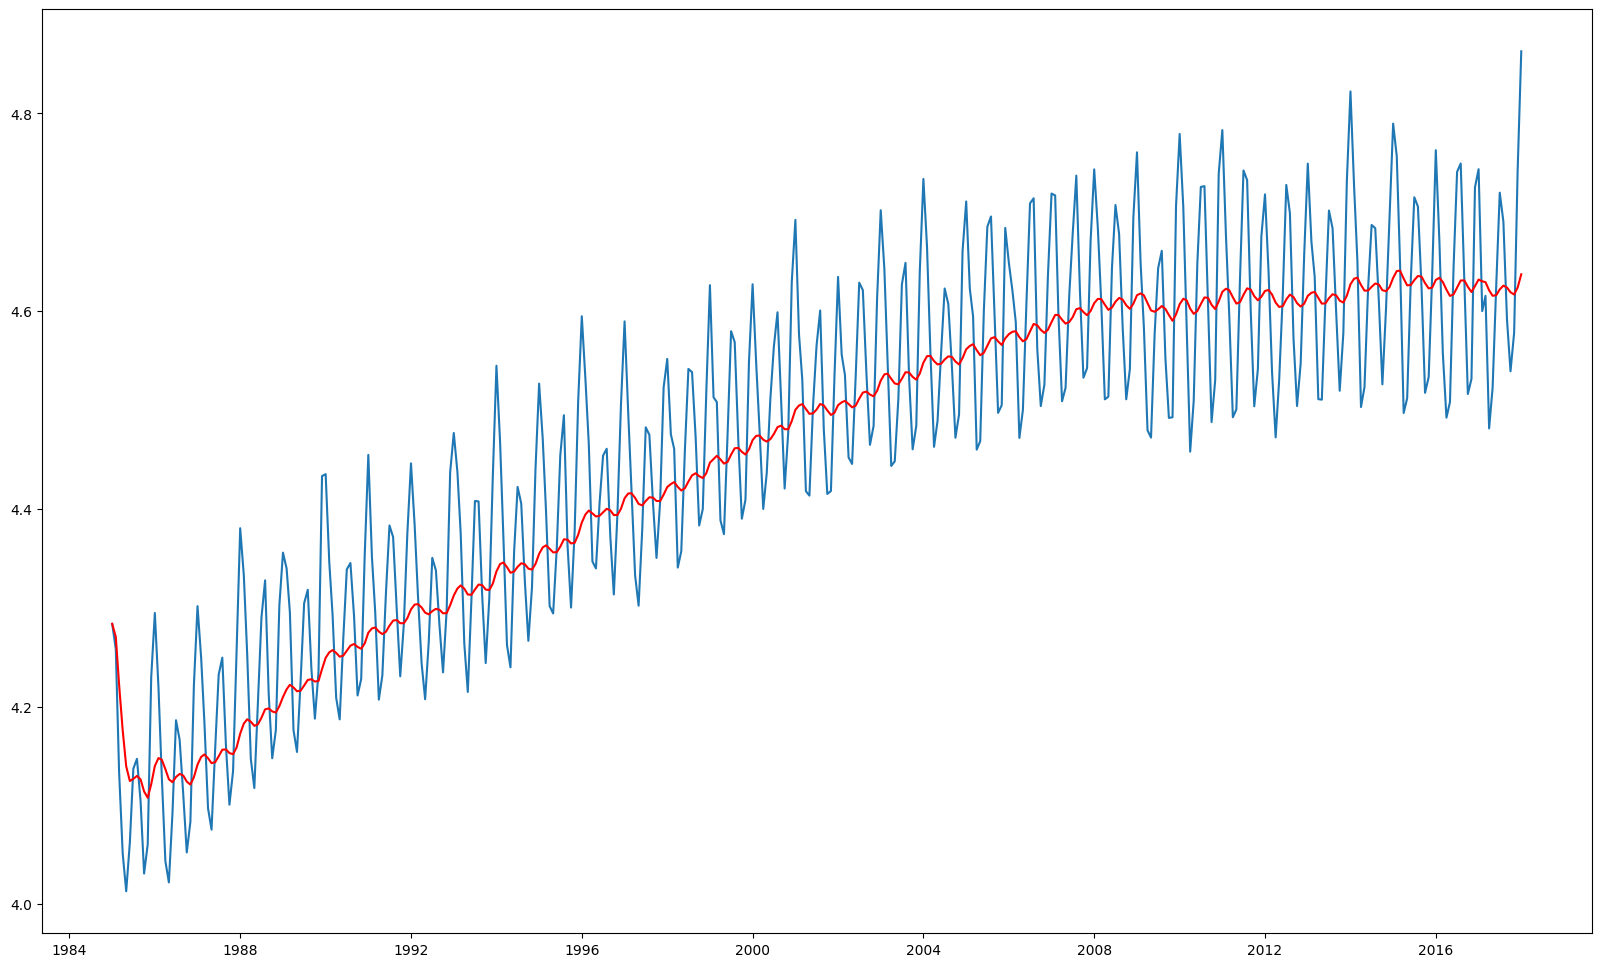

            IPG2211A2N
DATE                  
1985-01-01    4.283658
1985-02-01    4.270484
1985-03-01    4.222468
1985-04-01    4.175897
1985-05-01    4.139460
...                ...
2017-09-01    4.623900
2017-10-01    4.619145
2017-11-01    4.616845
2017-12-01    4.623898
2018-01-01    4.637314

[397 rows x 1 columns]


In [21]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.show()
print(exponentialDecayWeightedAverage)


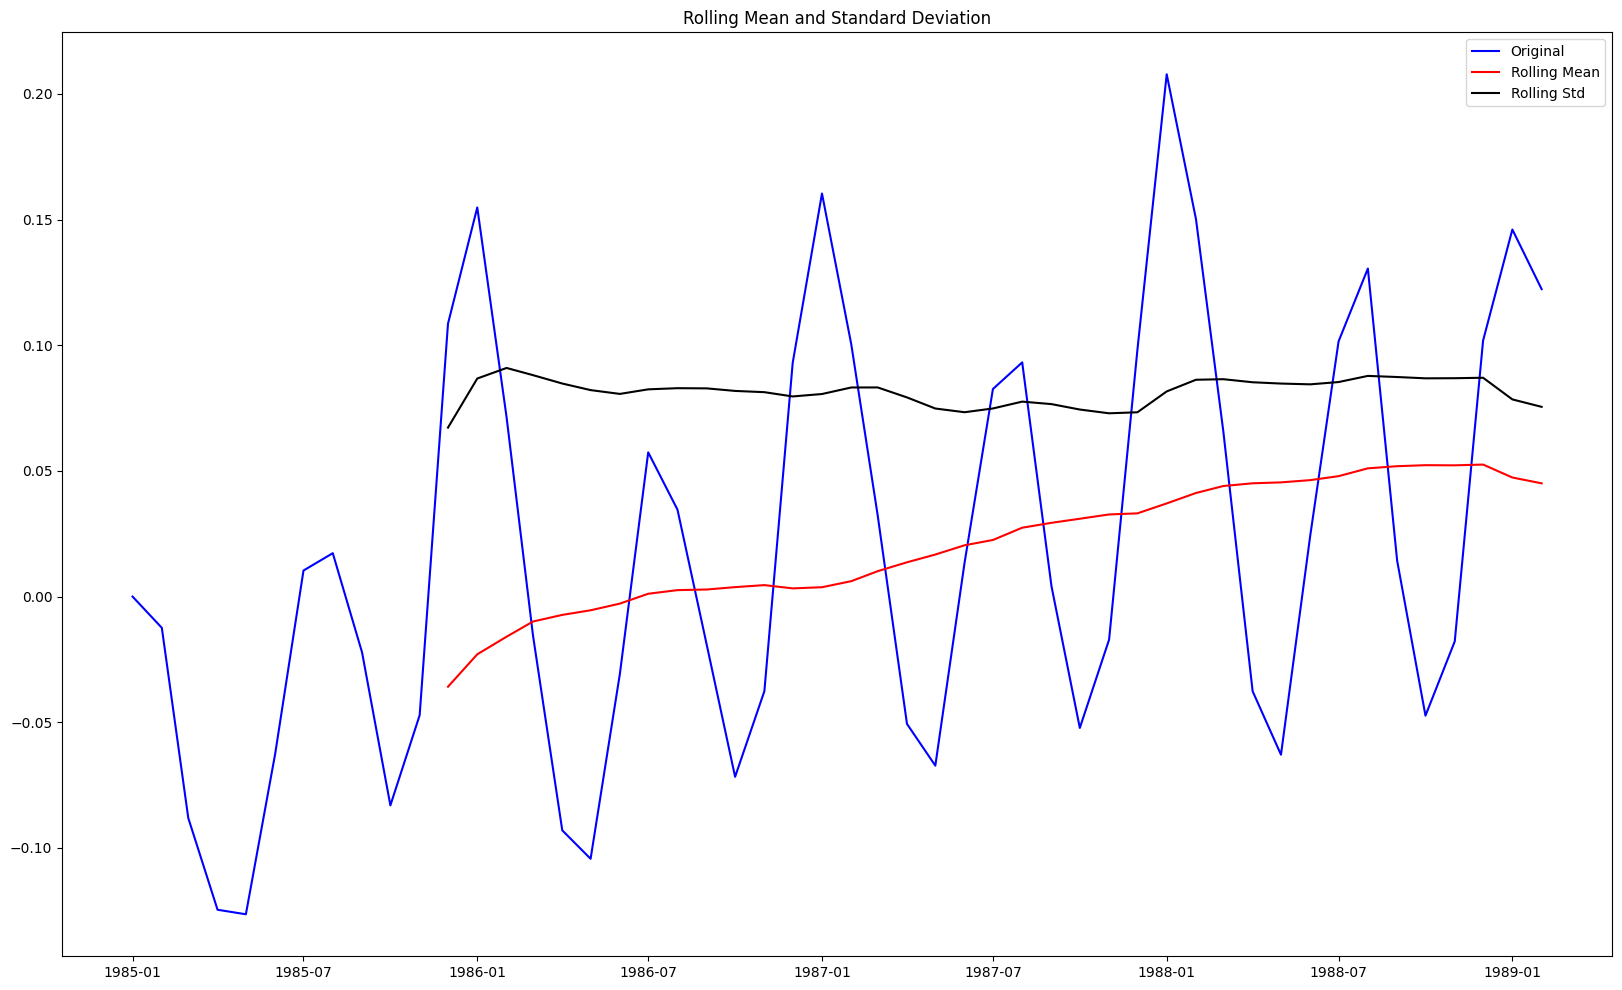

Results of Dickey-Fuller Test
Test Statistic                 -2.894185
p-value                         0.046028
Lags Used                      10.000000
Number of Observations Used    39.000000
Critical value (1%)            -3.610400
Critical value (5%)            -2.939109
Critical value (10%)           -2.608063
dtype: float64


In [22]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
datasetLogScaleMinusMovingExponentialDecayAverage = datasetLogScaleMinusMovingExponentialDecayAverage.dropna()
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage.head(50))

IPG2211A2N
DATE                  
1985-01-01         NaN
1985-02-01   -0.025609
1985-03-01   -0.123680
1985-04-01   -0.083082
1985-05-01   -0.038242
...                ...
2017-09-01   -0.099489
2017-10-01   -0.052051
2017-11-01    0.038991
2017-12-01    0.164337
2018-01-01    0.120441

[397 rows x 1 columns]

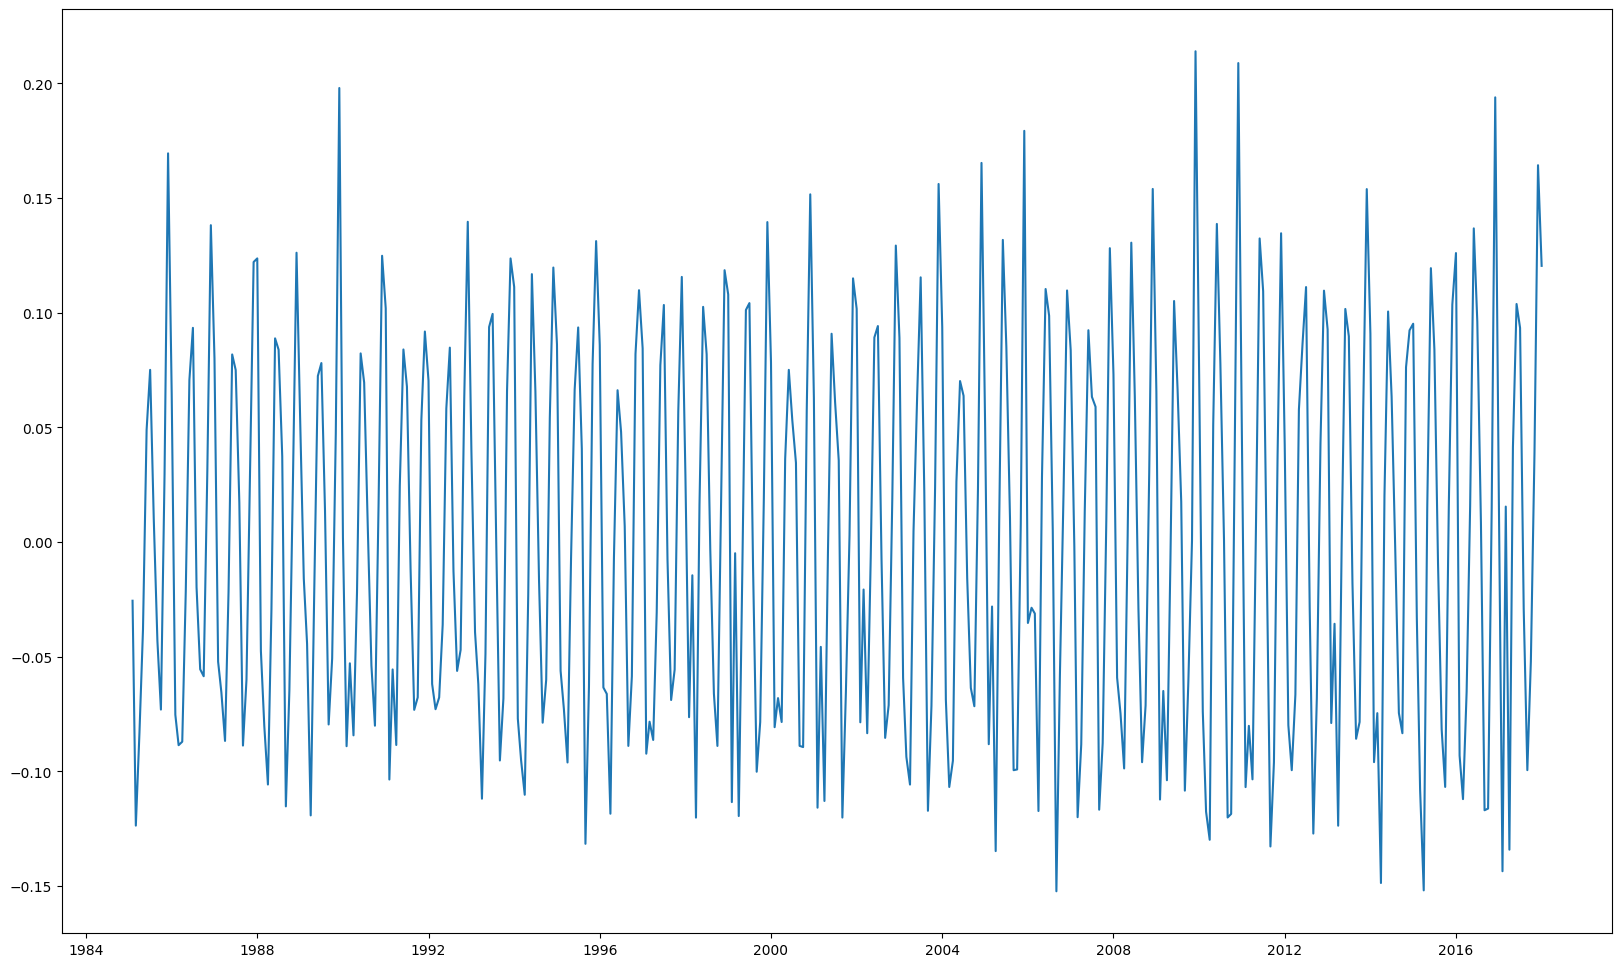

In [23]:
datasetLogDiffShifting=indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)
datasetLogDiffShifting

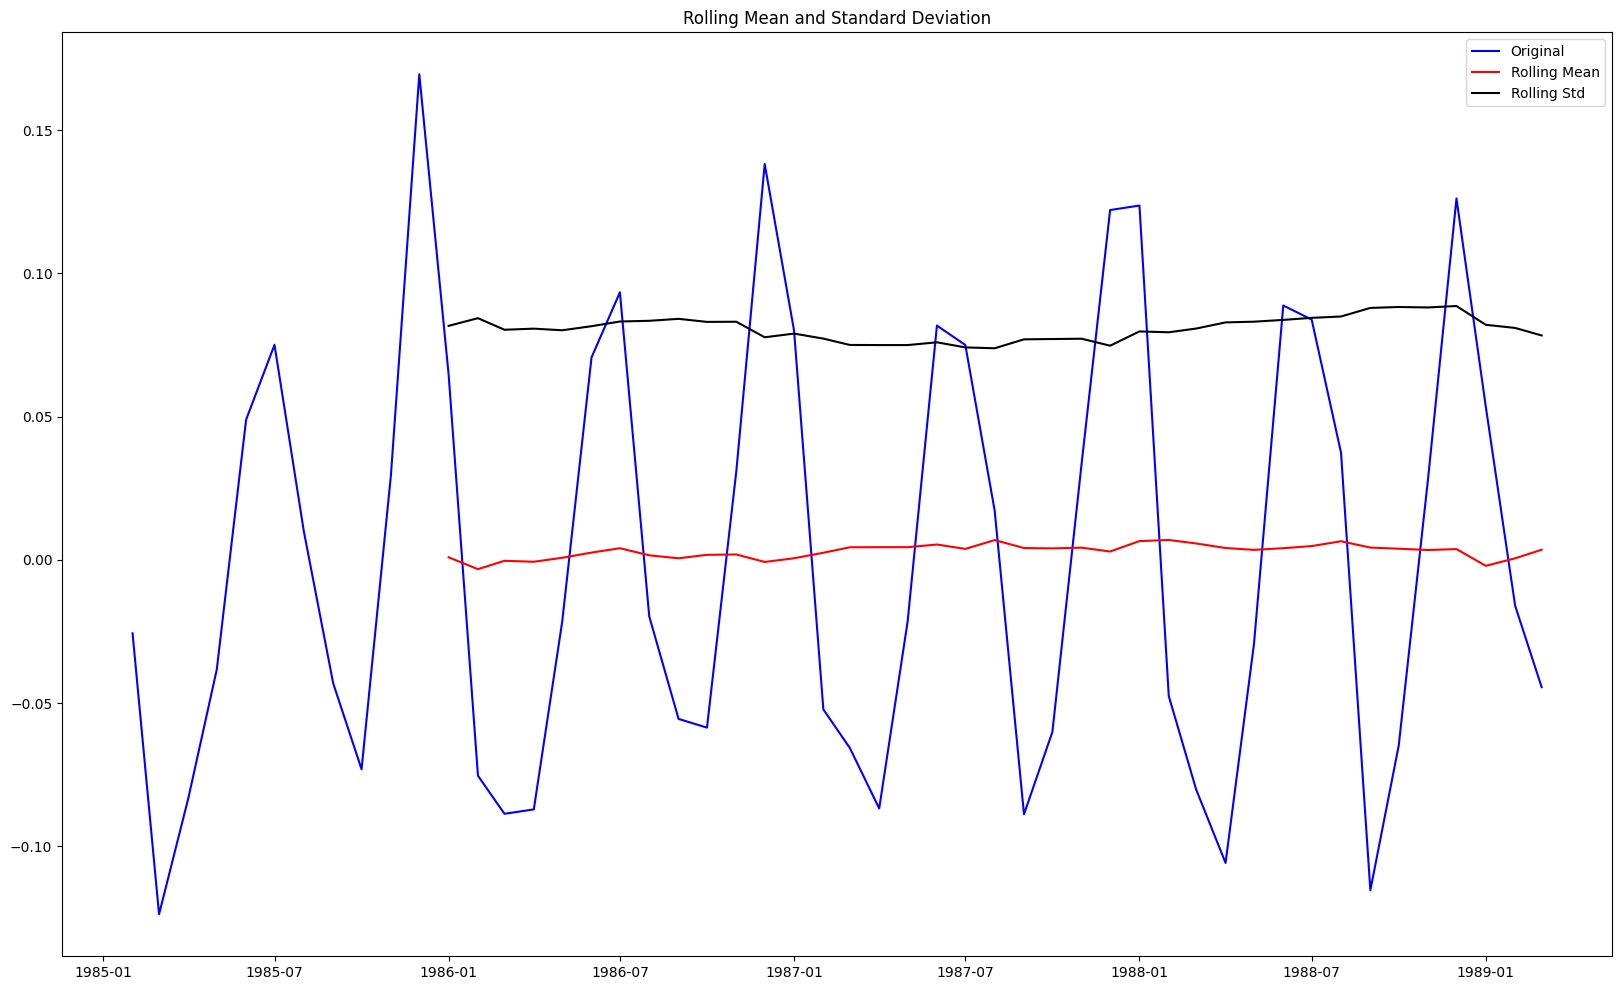

Results of Dickey-Fuller Test
Test Statistic                 -2.383820
p-value                         0.146355
Lags Used                      11.000000
Number of Observations Used    38.000000
Critical value (1%)            -3.615509
Critical value (5%)            -2.941262
Critical value (10%)           -2.609200
dtype: float64


IPG2211A2N
DATE                  
1985-02-01   -0.025609
1985-03-01   -0.123680
1985-04-01   -0.083082
1985-05-01   -0.038242
1985-06-01    0.048954
...                ...
2017-09-01   -0.099489
2017-10-01   -0.052051
2017-11-01    0.038991
2017-12-01    0.164337
2018-01-01    0.120441

[396 rows x 1 columns]

In [24]:
#Flat output
datasetLogDiffShifting=datasetLogDiffShifting.dropna()
test_stationarity(datasetLogDiffShifting.head(50))
datasetLogDiffShifting

In [25]:
indexedDataset

IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
...                ...
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

[397 rows x 1 columns]

In [26]:
datasetLogDiffShifting.rolling(window=12).mean()
indexedDataset_logscale=indexedDataset_logscale.dropna()
indexedDataset_logscale=indexedDataset_logscale.fillna(0)
indexedDataset_logscale

IPG2211A2N
DATE                  
1985-01-01    4.283658
1985-02-01    4.258049
1985-03-01    4.134369
1985-04-01    4.051287
1985-05-01    4.013046
...                ...
2017-09-01    4.591227
2017-10-01    4.539177
2017-11-01    4.578168
2017-12-01    4.742505
2018-01-01    4.862945

[397 rows x 1 columns]

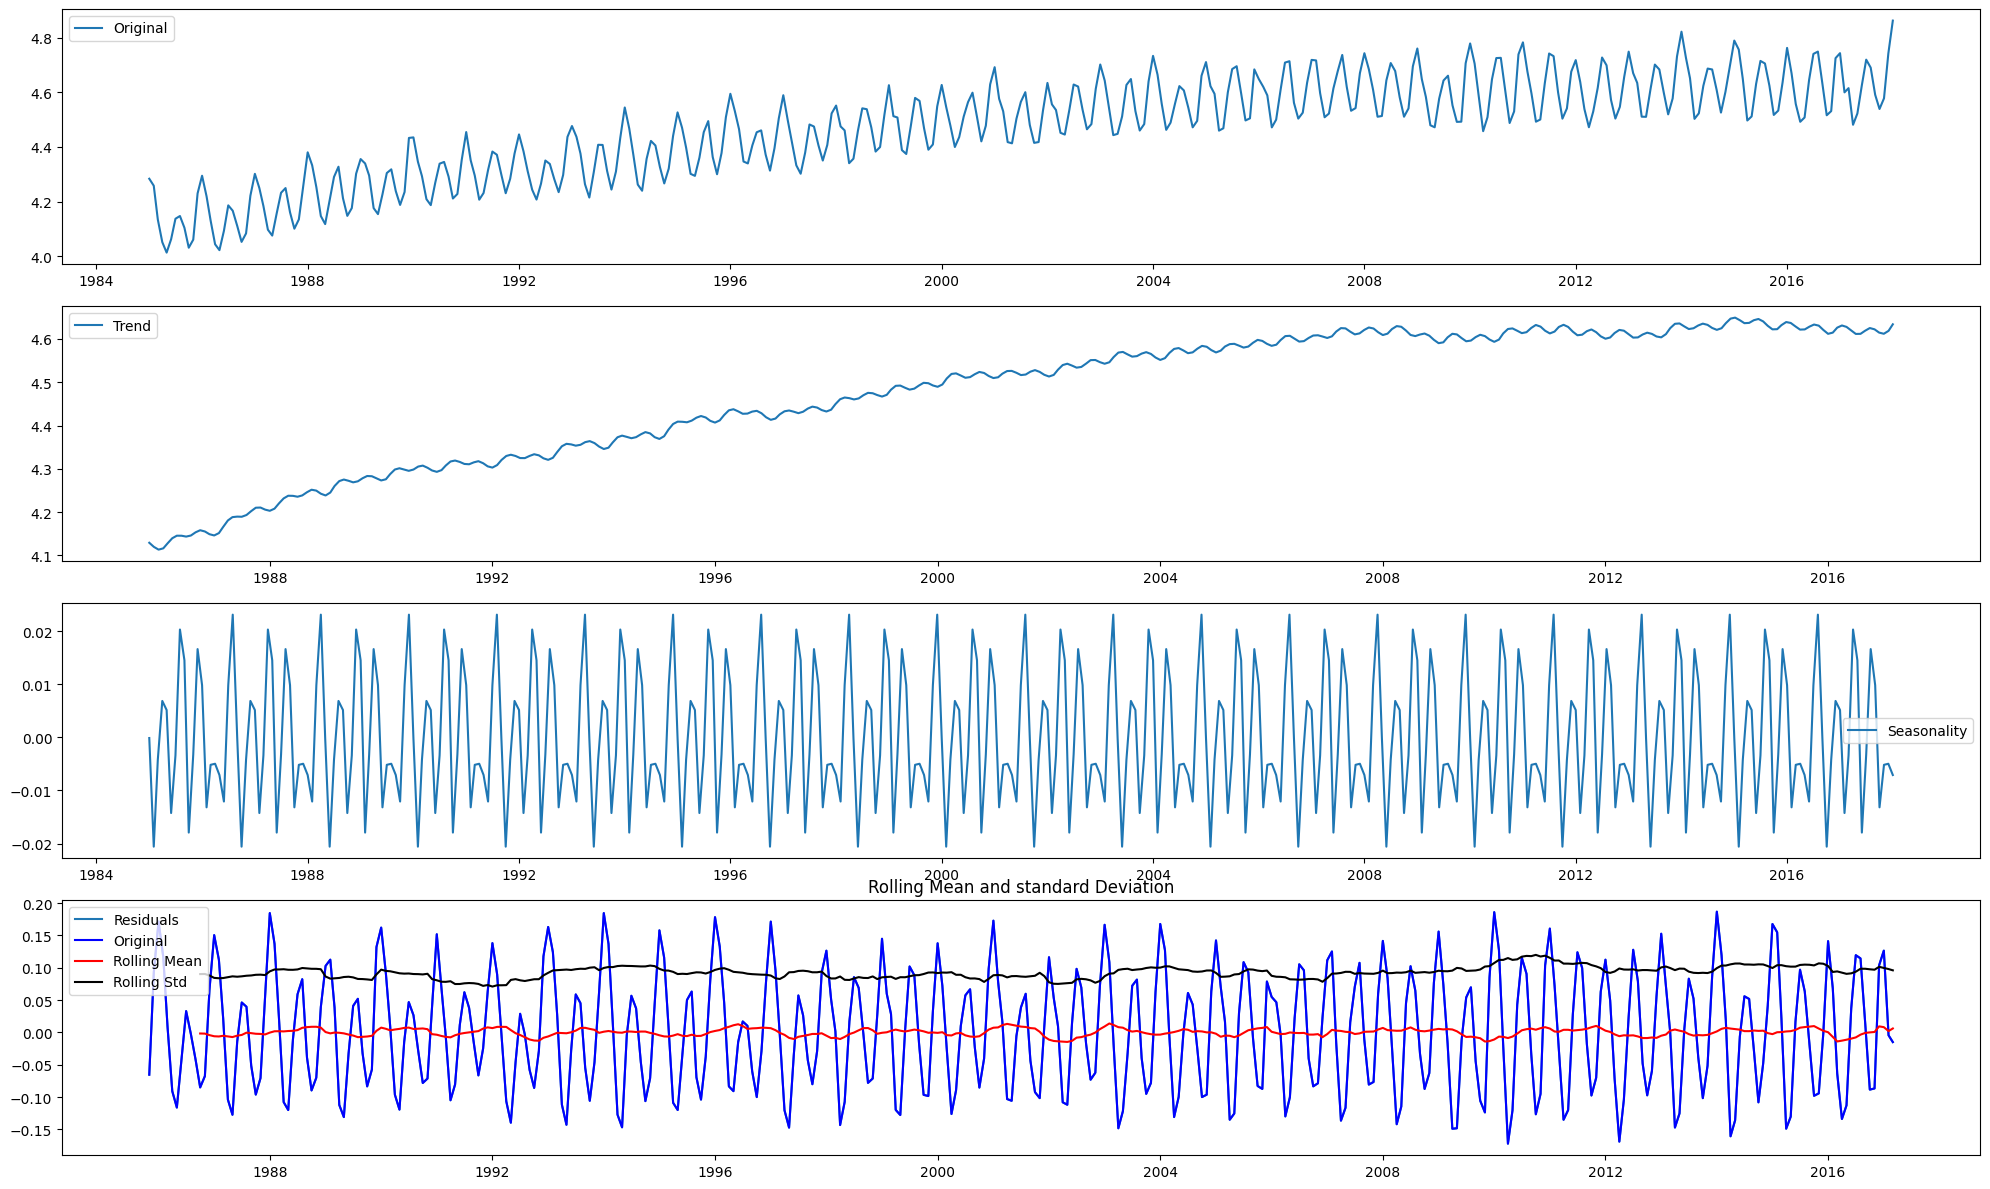

Results of Dickey-fuller Test
Test Statistic                -8.342787e+00
p-value                        3.143199e-13
Lags Used                      1.500000e+01
Number of Observations Used    3.610000e+02
Critical value (1%)           -3.448595e+00
Critical value (5%)           -2.869580e+00
Critical value (10%)          -2.571053e+00
dtype: float64


In [27]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

decomposition=seasonal_decompose(indexedDataset_logscale, period=20)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogdata=residual
decomposedLogdata.dropna(inplace=True)
decomposedLogdata
#Testing Stationarity
#Determing rolling statistics
movingAverage=decomposedLogdata.rolling(window=12).mean()
movingSTD=decomposedLogdata.rolling(window=12).std()
#plot rolling statistics
orig = plt.plot(decomposedLogdata, color='blue', label='Original')
mean =plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and standard Deviation')
plt.show(block=False)
#Perform Dickey-fuller test
print('Results of Dickey-fuller Test')
dftest=adfuller(decomposedLogdata, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical value (%s)' % key] = value

print(dfoutput)


In [28]:
indexedDataset_logscale

IPG2211A2N
DATE                  
1985-01-01    4.283658
1985-02-01    4.258049
1985-03-01    4.134369
1985-04-01    4.051287
1985-05-01    4.013046
...                ...
2017-09-01    4.591227
2017-10-01    4.539177
2017-11-01    4.578168
2017-12-01    4.742505
2018-01-01    4.862945

[397 rows x 1 columns]

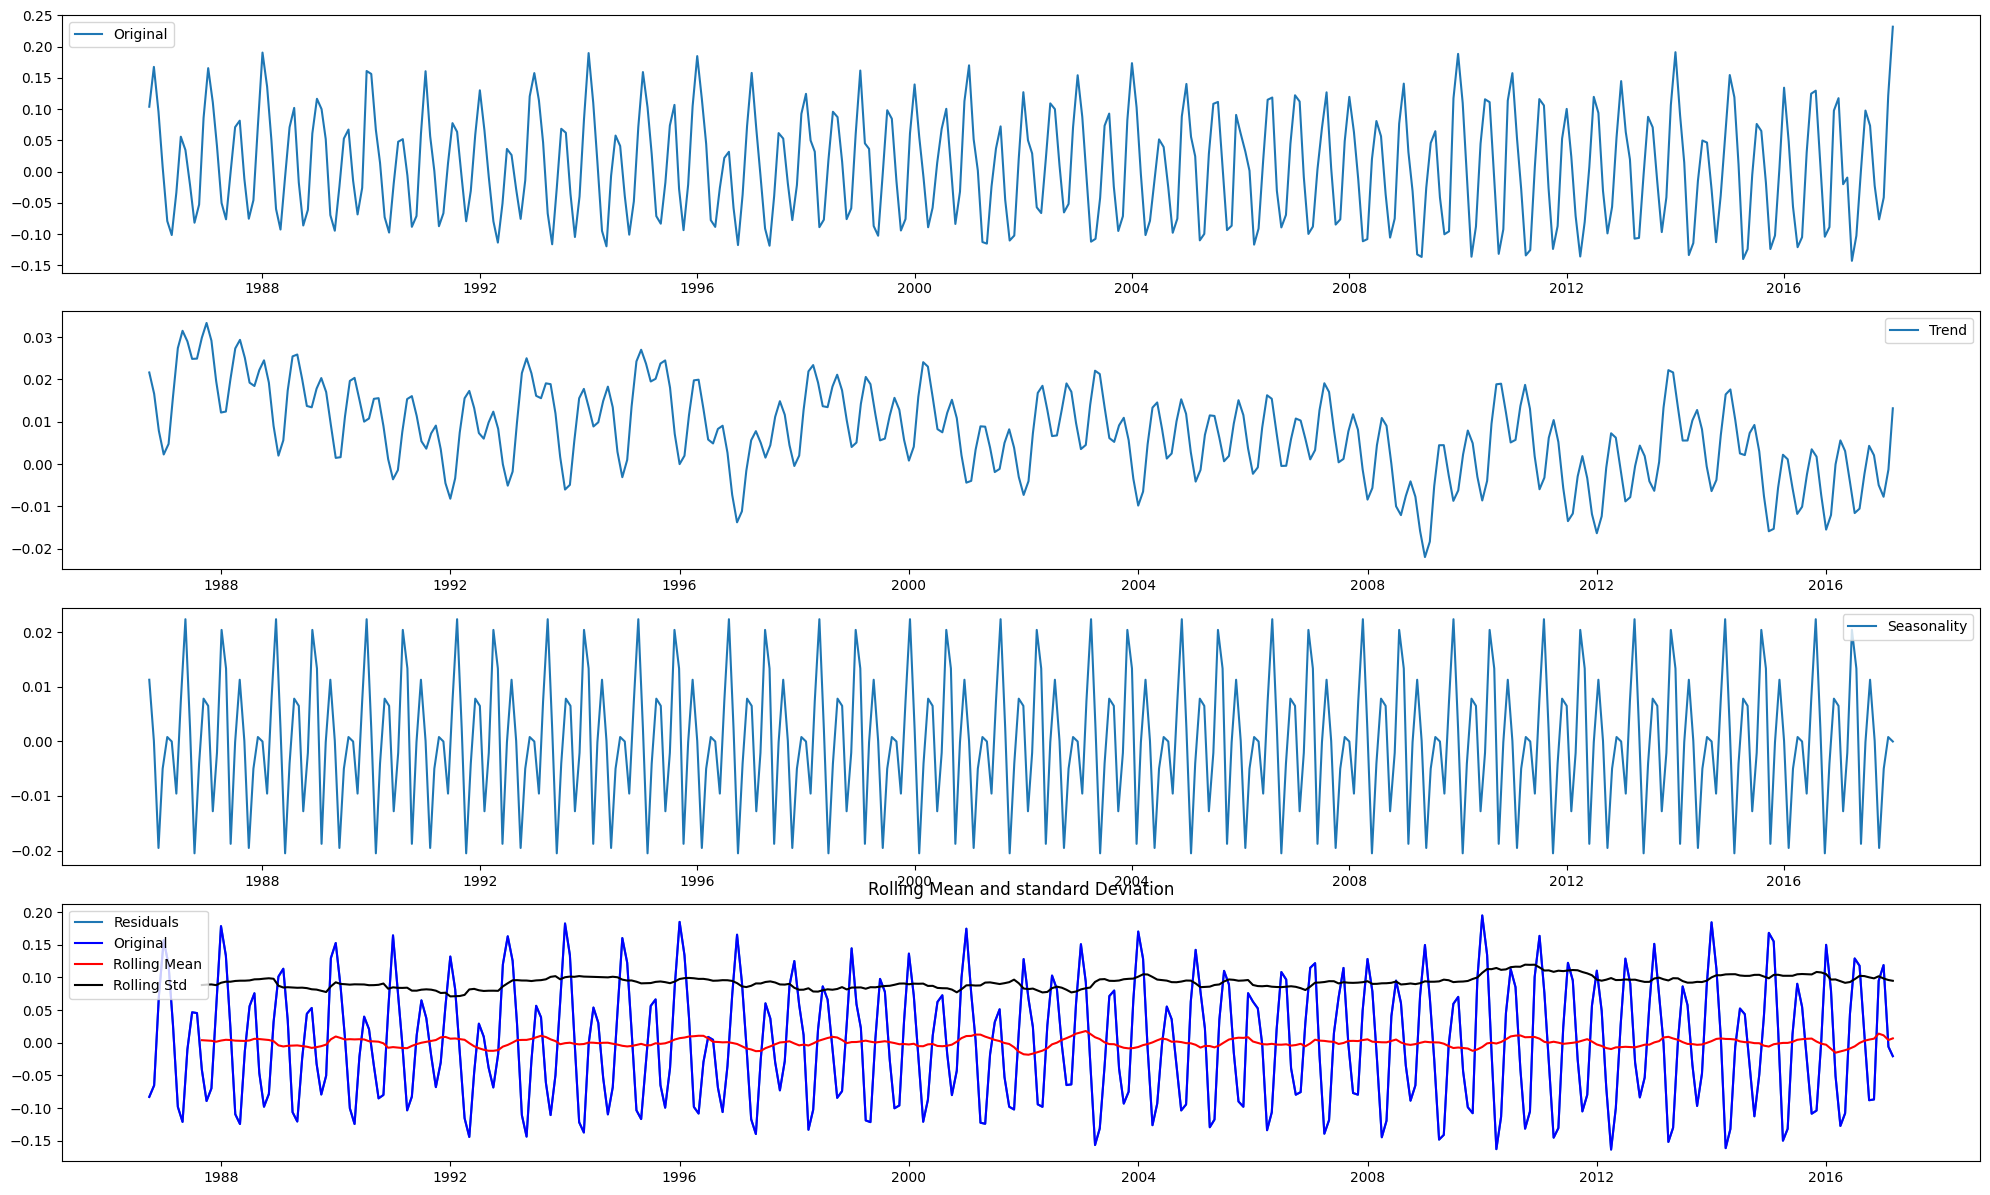

Results of Dickey-fuller Test
Test Statistic                -9.307173e+00
p-value                        1.072987e-15
Lags Used                      1.500000e+01
Number of Observations Used    3.500000e+02
Critical value (1%)           -3.449173e+00
Critical value (5%)           -2.869833e+00
Critical value (10%)          -2.571188e+00
dtype: float64


In [29]:
decomposition=seasonal_decompose(datasetLogScaleMinusMovingAverage, period=20)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(datasetLogScaleMinusMovingAverage, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogdata=residual
decomposedLogdata.dropna(inplace=True)
decomposedLogdata
#Testing Stationarity
#Determing rolling statistics
movingAverage=decomposedLogdata.rolling(window=12).mean()
movingSTD=decomposedLogdata.rolling(window=12).std()
#plot rolling statistics
orig = plt.plot(decomposedLogdata, color='blue', label='Original')
mean =plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and standard Deviation')
plt.show(block=False)
#Perform Dickey-fuller test
print('Results of Dickey-fuller Test')
dftest=adfuller(decomposedLogdata, autolag='AIC') 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical value (%s)' % key] = value

print(dfoutput)

In [30]:
datasetLogDiffShifting

IPG2211A2N
DATE                  
1985-02-01   -0.025609
1985-03-01   -0.123680
1985-04-01   -0.083082
1985-05-01   -0.038242
1985-06-01    0.048954
...                ...
2017-09-01   -0.099489
2017-10-01   -0.052051
2017-11-01    0.038991
2017-12-01    0.164337
2018-01-01    0.120441

[396 rows x 1 columns]

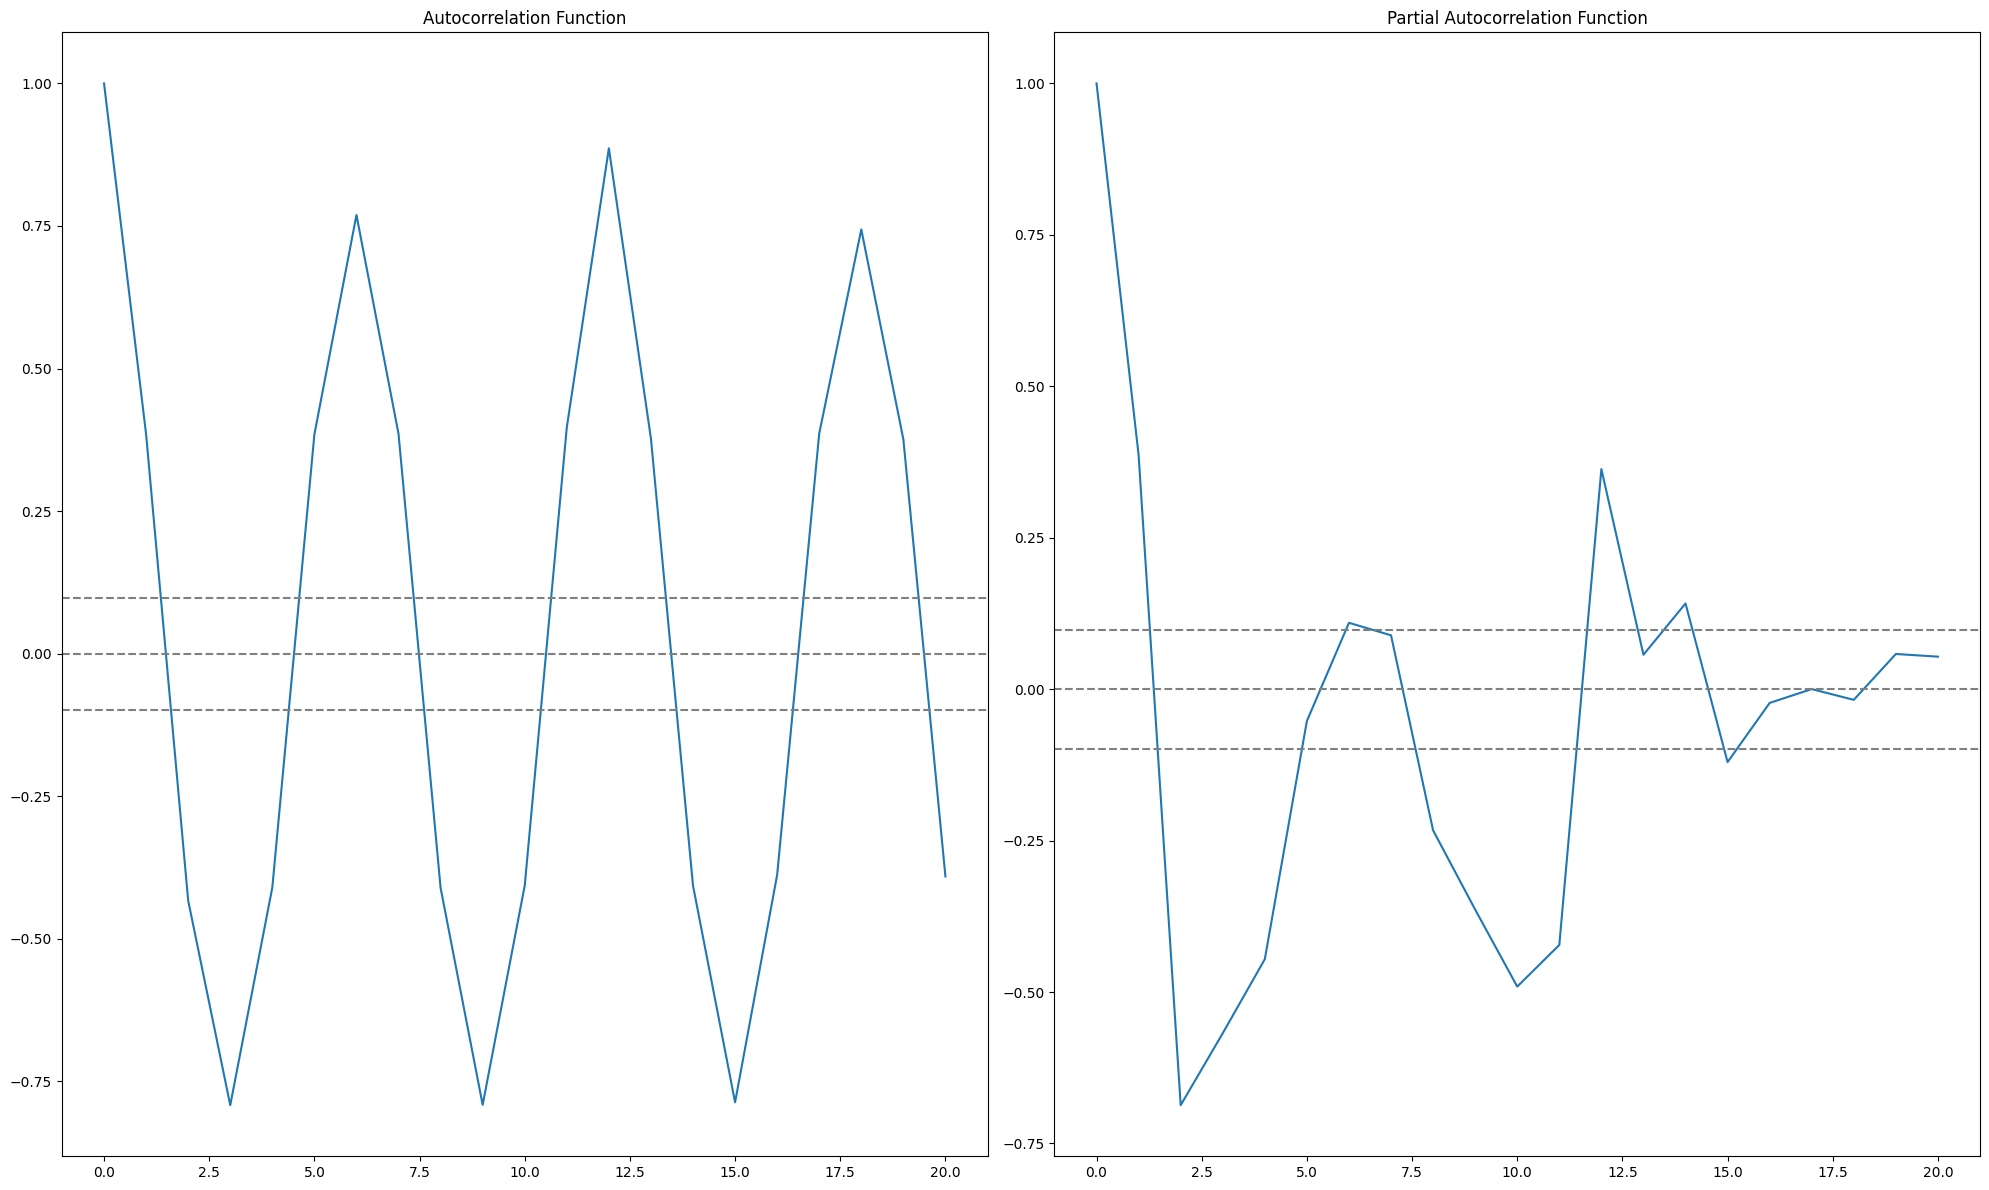

In [31]:
#ACF and PACF Plot
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')
#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')

plt.title('Autocorrelation Function')
#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation Function')
plt.tight_layout() 

In [32]:
lag_acf

array([ 1.        ,  0.38445032, -0.43294285, -0.79175348, -0.40991521,
        0.38449087,  0.76926709,  0.38539589, -0.41066568, -0.79114935,
       -0.40659745,  0.39691407,  0.88626219,  0.37705106, -0.40680457,
       -0.78666236, -0.38789489,  0.3860148 ,  0.74393216,  0.37591781,
       -0.39077284])

In [33]:
lag_pacf

array([ 1.00000000e+00,  3.86408655e-01, -6.86777095e-01, -5.67945290e-01,
       -4.45729630e-01, -5.25372616e-02,  1.09586091e-01,  8.89234107e-02,
       -2.33066274e-01, -3.63853860e-01, -4.90969666e-01, -4.22299852e-01,
        3.63292443e-01,  5.68241606e-02,  1.41517967e-01, -1.20405121e-01,
       -2.27239515e-02,  1.66546712e-04, -1.76353599e-02,  5.80927429e-02,
        5.36782614e-02])

c:\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


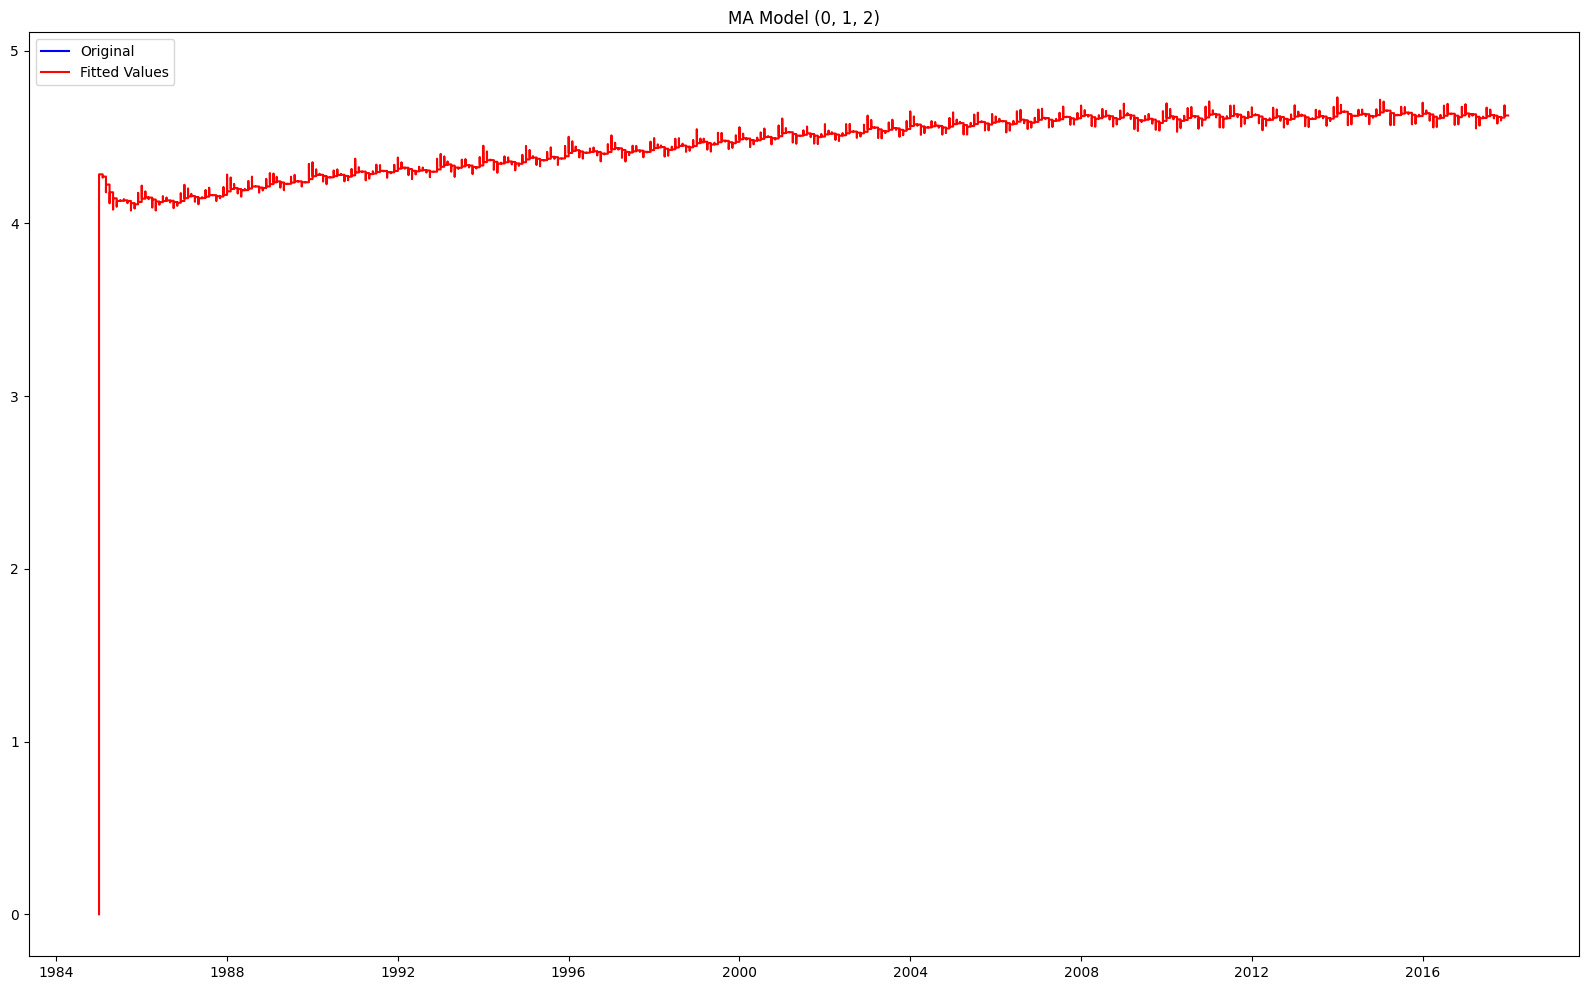

DATE
1985-01-01 00:00:00    0.000000
1985-01-01 00:30:00    4.283658
1985-01-01 01:00:00    4.283658
1985-01-01 01:30:00    4.283658
1985-01-01 02:00:00    4.283658
                         ...   
2017-12-31 22:00:00    4.624383
2017-12-31 22:30:00    4.624383
2017-12-31 23:00:00    4.624383
2017-12-31 23:30:00    4.624383
2018-01-01 00:00:00    4.624383
Freq: 30T, Length: 578545, dtype: float64
Plotting MA model


In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'Total' column represents the log-scaled time series data
clone_indexedDataset_logscale = indexedDataset_logscale['IPG2211A2N'].copy().resample('30min').mean()
clone_indexedDataset_logscale.index = pd.DatetimeIndex(clone_indexedDataset_logscale.index)

# Create the ARIMA model with order (p, d, q) = (0, 1, 2)
model = ARIMA(clone_indexedDataset_logscale, order=(0, 1, 2))

# Fit the ARIMA model
results_MA = model.fit()

# Plot the original time series and the fitted values
plt.plot(clone_indexedDataset_logscale, color='blue', label='Original')
plt.plot(results_MA.fittedvalues, color='red', label='Fitted Values')
plt.legend(loc='best')
plt.title('MA Model (0, 1, 2)')
plt.show()

print(results_MA.fittedvalues)
print('Plotting MA model')


c:\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\python38\lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\python38\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


DATE
1985-01-01 00:00:00    0.0
1985-01-01 00:30:00    NaN
1985-01-01 01:00:00    NaN
1985-01-01 01:30:00    NaN
1985-01-01 02:00:00    NaN
                      ... 
2017-12-31 22:00:00    NaN
2017-12-31 22:30:00    NaN
2017-12-31 23:00:00    NaN
2017-12-31 23:30:00    NaN
2018-01-01 00:00:00    NaN
Freq: 30T, Length: 578545, dtype: float64
Plotting AR model


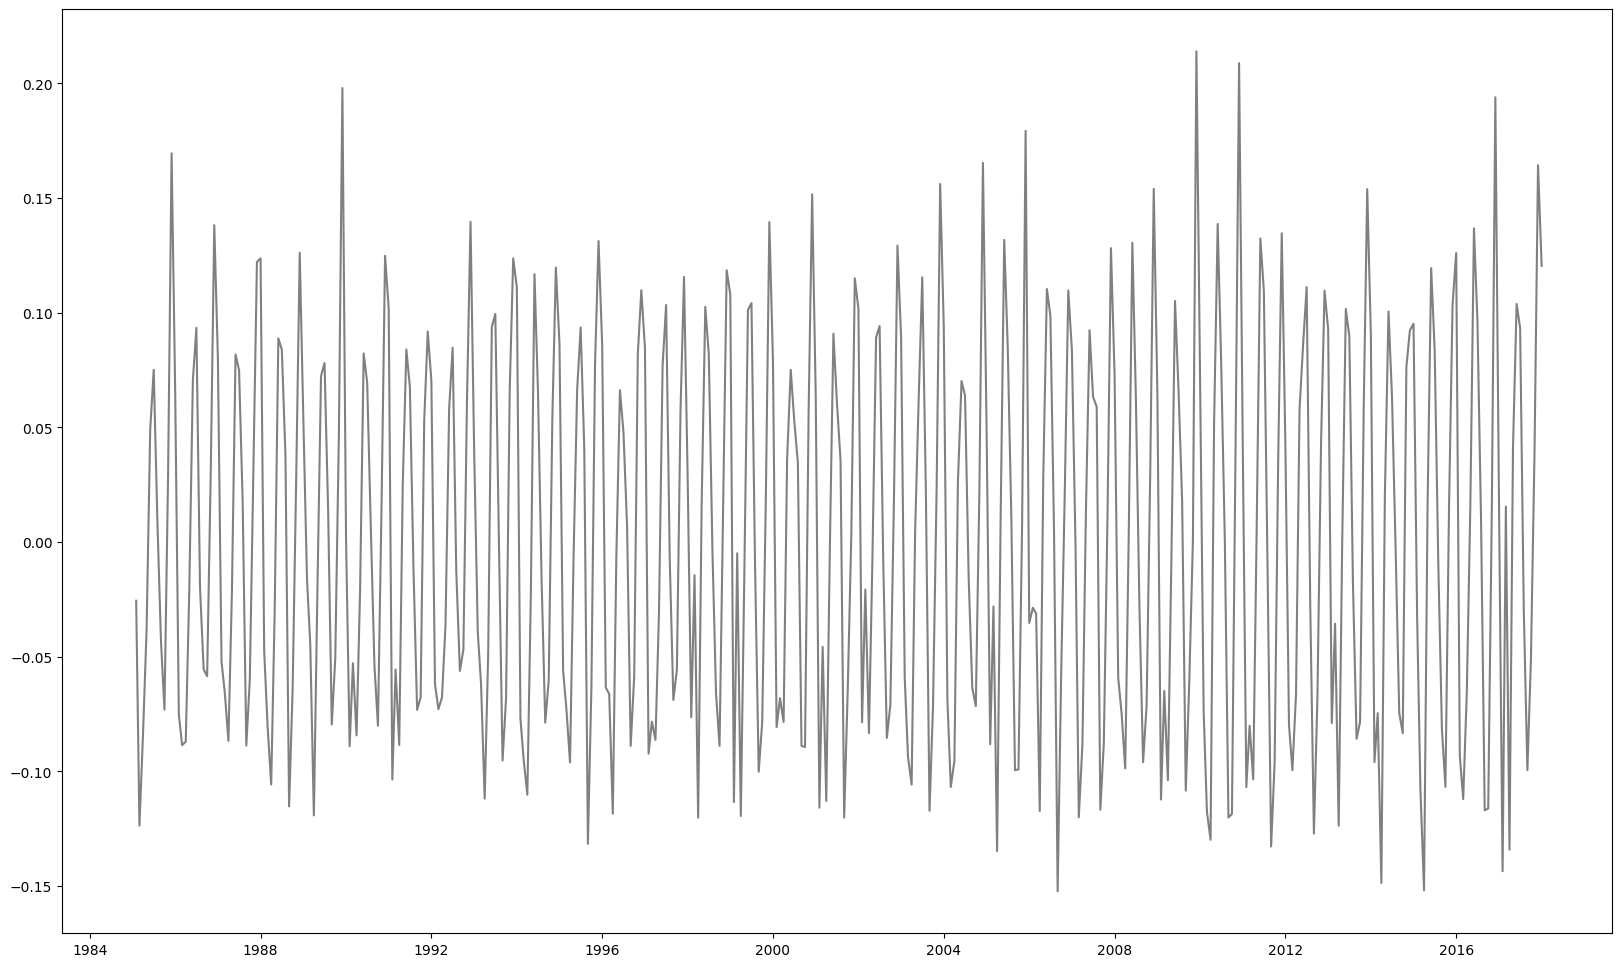

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# AR Model
clone_indexedDataset_logscale.index = pd.DatetimeIndex(clone_indexedDataset_logscale.index)
model = ARIMA(clone_indexedDataset_logscale, order=(2, 1, 0))
results_AR = model.fit()

plt.plot(datasetLogDiffShifting, color='gray')
plt.plot(results_AR.fittedvalues, color='red')
print(results_AR.fittedvalues)
print('Plotting AR model')

c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


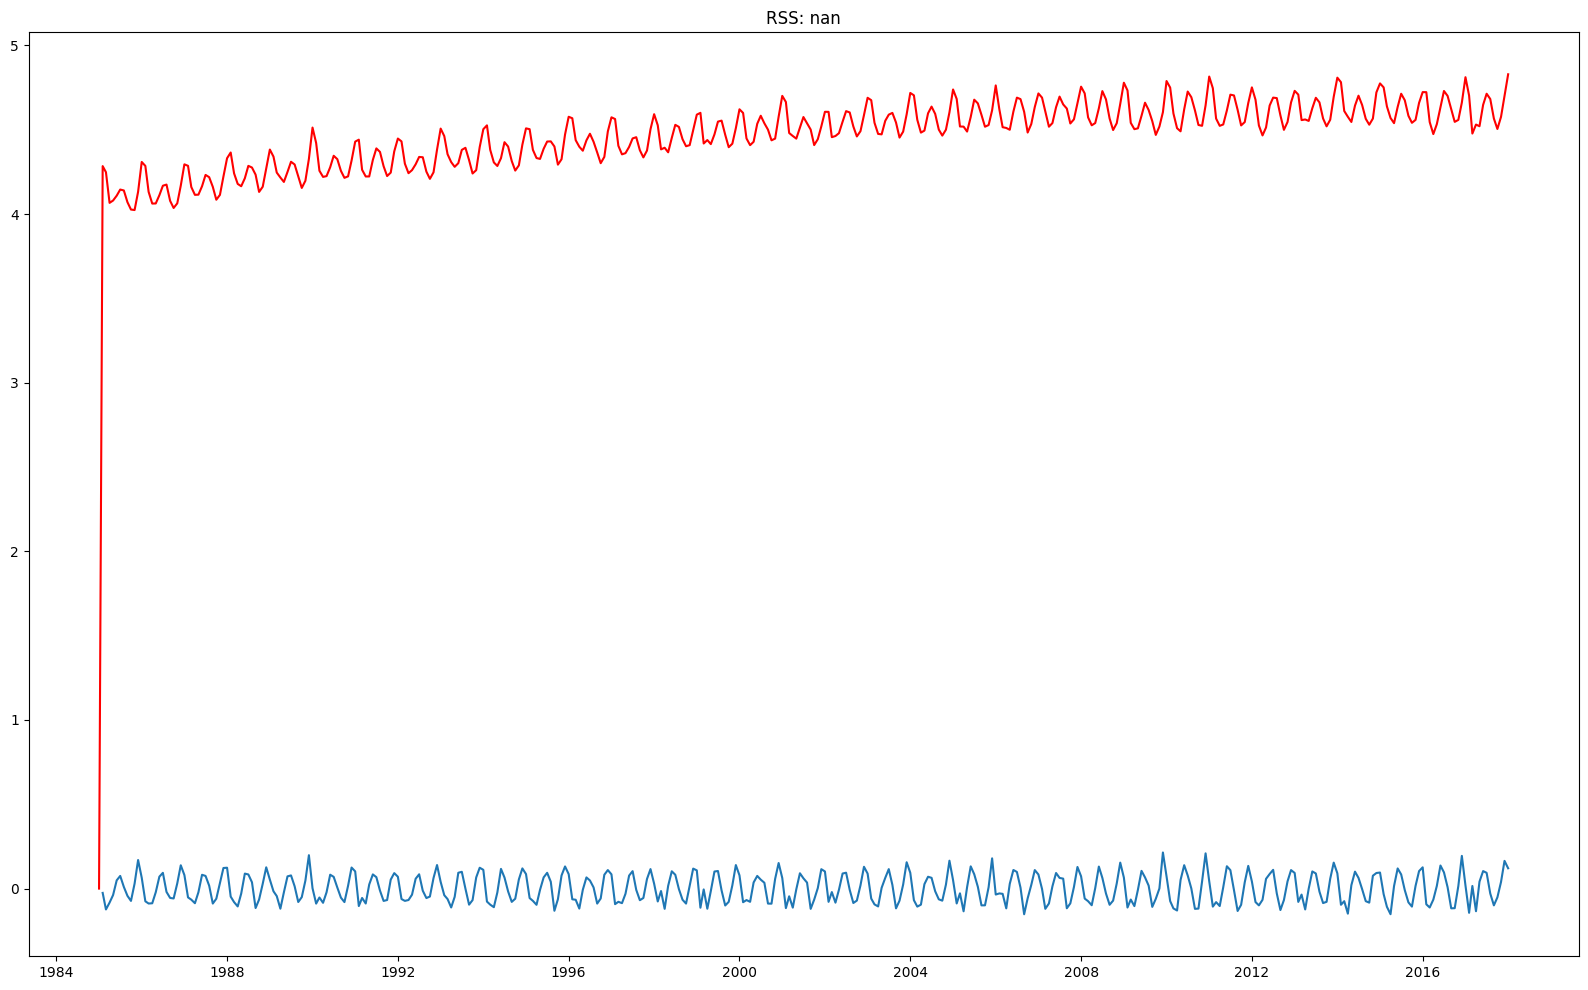

DATE
1985-01-01    0.000000
1985-02-01    4.283658
1985-03-01    4.247539
1985-04-01    4.065722
1985-05-01    4.079596
                ...   
2017-09-01    4.565859
2017-10-01    4.503862
2017-11-01    4.575431
2017-12-01    4.701481
2018-01-01    4.828133
Length: 397, dtype: float64
Plotting ARIMA model


In [36]:
model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))
results_ARIMA = model.fit()

plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting["IPG2211A2N"])**2))
plt.show()

# Eksikleri tamamla ve sonuçları göster
print(results_ARIMA.fittedvalues)
print('Plotting ARIMA model')


In [37]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head()) 

DATE
1985-01-01    0.000000
1985-02-01    4.283658
1985-03-01    4.247539
1985-04-01    4.065722
1985-05-01    4.079596
dtype: float64


In [38]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1985-01-01     0.000000
1985-02-01     4.283658
1985-03-01     8.531197
1985-04-01    12.596919
1985-05-01    16.676515
dtype: float64


In [39]:
# ARIMA modelinden yapılan tahminleri log skale üzerinde toplamaya başlayın
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['IPG2211A2N'], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(results_ARIMA.fittedvalues, fill_value=0)

# Kumulatif toplamı alarak tahminleri ters log dönüşümü yapın
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# İlk 10 tahmini göster
print(predictions_ARIMA.head())


DATE
1985-01-01      72.505200
1985-02-01    5124.087562
1985-03-01    4367.334791
1985-04-01    3350.983131
1985-05-01    3270.316853
dtype: float64


In [40]:
predictions_ARIMA_log

DATE
1985-01-01    4.283658
1985-02-01    8.541708
1985-03-01    8.381908
1985-04-01    8.117009
1985-05-01    8.092642
                ...   
2017-09-01    9.157086
2017-10-01    9.043038
2017-11-01    9.153599
2017-12-01    9.443986
2018-01-01    9.691079
Length: 397, dtype: float64

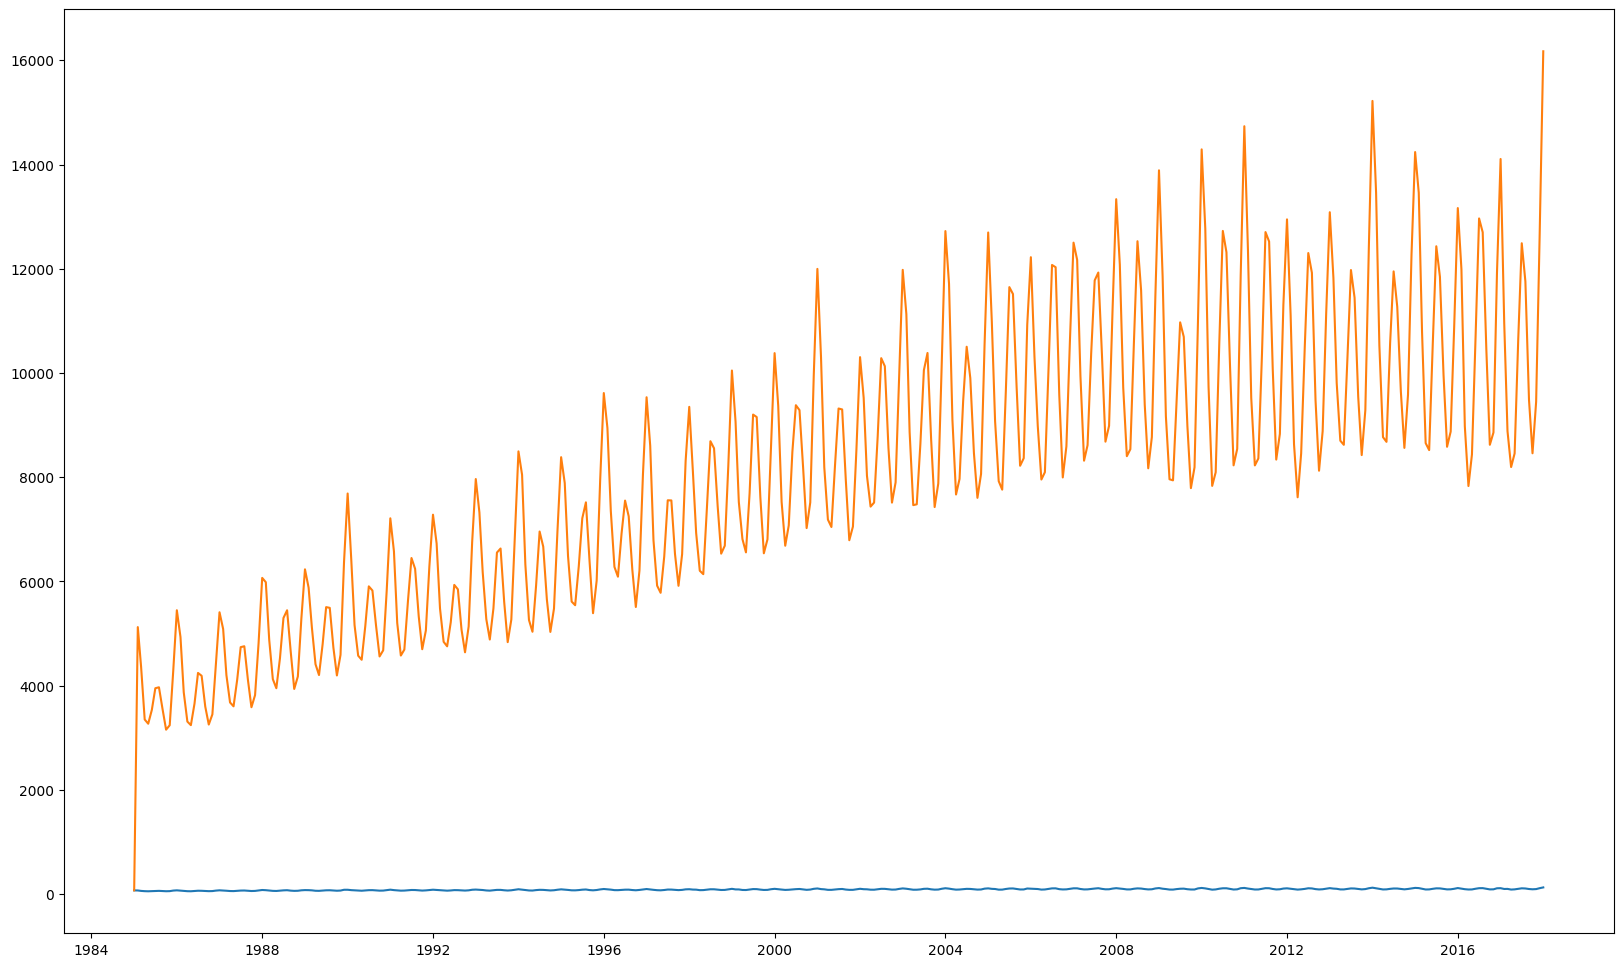

In [41]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [42]:
predictions_ARIMA

DATE
1985-01-01       72.505200
1985-02-01     5124.087562
1985-03-01     4367.334791
1985-04-01     3350.983131
1985-05-01     3270.316853
                  ...     
2017-09-01     9481.388469
2017-10-01     8459.441596
2017-11-01     9448.386583
2017-12-01    12631.964096
2018-01-01    16172.681763
Length: 397, dtype: float64

In [43]:
indexedDataset_logscale

IPG2211A2N
DATE                  
1985-01-01    4.283658
1985-02-01    4.258049
1985-03-01    4.134369
1985-04-01    4.051287
1985-05-01    4.013046
...                ...
2017-09-01    4.591227
2017-10-01    4.539177
2017-11-01    4.578168
2017-12-01    4.742505
2018-01-01    4.862945

[397 rows x 1 columns]

In [44]:
x=results_ARIMA.forecast(steps=397)
x

2018-02-01    4.823881
2018-03-01    4.699055
2018-04-01    4.613374
2018-05-01    4.652559
2018-06-01    4.777383
                ...   
2050-10-01    4.614898
2050-11-01    4.668762
2050-12-01    4.792051
2051-01-01    4.861399
2051-02-01    4.807429
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64

In [45]:
results_ARIMA

In [46]:
td = pd.read_csv('Electric_Production.csv',
 header=0,
 usecols=["IPG2211A2N"])
td

IPG2211A2N
0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
..          ...
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048

[397 rows x 1 columns]

In [47]:
td['IPG2211A2N']

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [48]:
#Measuring Time Series Forecasting Performance
#Evaluation Metrics to Measure Performance:
#R-Squared
#Mean Absolute Error
#Mean Absolute Percentage Error
#Mean Squared Error
#Root Mean Squared Error
#Normalized Root Mean Squared Error
#Weighted Absolute Percentage Error
#Weighted Mean Absolute Percentage Error
x

2018-02-01    4.823881
2018-03-01    4.699055
2018-04-01    4.613374
2018-05-01    4.652559
2018-06-01    4.777383
                ...   
2050-10-01    4.614898
2050-11-01    4.668762
2050-12-01    4.792051
2051-01-01    4.861399
2051-02-01    4.807429
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64

In [49]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error
y_actual = td['IPG2211A2N']
y_predicted = x
RMSE = mean_squared_error(y_actual, y_predicted, squared=False)
print("Root Mean Square Error (RMSE):\n")
print(RMSE)

Root Mean Square Error (RMSE):

85.49878170132835


In [50]:
# Mean Absolute Percentage Error (MAPE)
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true))*100
MAPE=mean_absolute_percentage_error(y_actual, y_predicted)
print("Mean Absolute Percentage Error (MAPE):\n")
print(MAPE)

Mean Absolute Percentage Error (MAPE):

94.49571686856079


In [51]:
df = pd.DataFrame(x)

# show the dataframe
print(df)

# iterating over and calling
# tolist() method for
# each column
for i in list(df):

 # show the list of values
 print(df[i].tolist())

            predicted_mean
2018-02-01        4.823881
2018-03-01        4.699055
2018-04-01        4.613374
2018-05-01        4.652559
2018-06-01        4.777383
...                    ...
2050-10-01        4.614898
2050-11-01        4.668762
2050-12-01        4.792051
2051-01-01        4.861399
2051-02-01        4.807429

[397 rows x 1 columns]
[4.823881198528028, 4.699055238243181, 4.613374410921981, 4.6525588419538435, 4.777382528420966, 4.862940949476789, 4.823636471242098, 4.698815207574153, 4.613379234981646, 4.652803653630761, 4.777622345594859, 4.862935827694287, 4.8233915755104375, 4.698575604077933, 4.613384654333207, 4.653048633080984, 4.777861735231212, 4.862930110927724, 4.823146512677765, 4.698336428483294, 4.61339066836043, 4.653293778960059, 4.778100696602641, 4.862923799794461, 4.822901284088269, 4.698097681516225, 4.613397276444831, 4.653539089924061, 4.778339228984544, 4.862916894914103, 4.822655891085605, 4.6978593638999415, 4.613404477965686, 4.65378456462961, 4.77